
# Project 8 : Introduction to Computer Vision - Plants Seedling Classification

#### By   : Rakesh Jyothi Krishnan
#### Batch: PGP - ARTIFICIAL INTELLIGENCE & MACHINE LEARNING . PGP-AIML-BA-UTA-Sept'21-A
#### Date : 05/06/2022
---

# Description

## Background & Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.

The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can benefit the workers in this field, as the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


## Objective

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. You being a data scientist, need to build a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.


## Data Description

This dataset contains images of unique plants belonging to 12 different species.
- The data file names are:
    - images.npy
    - Label.csv
- Due to the large volume of data, the images were converted to numpy arrays and stored in images.npy file and the corresponding labels are also put into Labels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.
- The goal of the project is to create a classifier capable of determining a plant's species from an image.

## List of Plant species

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet



### Table of Contents

1. <a href='#1. Import  Libraries'>Import  Libraries</a>

2. <a href='#2. Load Data'>Load Data</a>

3. <a href='#3. Overview of Data'>Overview of Data</a>

4. <a href='#4. Plot Images'>Plot Images</a>
 
5. <a href='#5. Exploratory Data Analysis'>Exploratory Data Analysis</a>

6. <a href='#6. Exploratory Deep Dive'>Exploratory Deep Dive</a>
    
7. <a href='#7. Insights Based On EDA'>Insights Based On EDA</a>

8. <a href='#8. Data Preprocessing'>Data Preprocessing</a>

9. <a href='#9. Make Data Compatible'>Make Data Compatible</a>

10. <a href='#10. Model Building - Convolutional Neural Network (CNN)'>Model Building - Convolutional Neural Network (CNN)</a>

11. <a href='#11. Model Performance Improvement'>Model Performance Improvement</a>

12. <a href='#12. Transfer Learning using VGG16'>Transfer Learning using VGG16</a>

13. <a href='#13. Transfer Learning using VGG16 + Data Augmentation'>Transfer Learning using VGG16 + Data Augmentation</a>

14. <a href='#14. Conclusions & Takeaways'>Conclusions & Takeaways</a>


### 1. Import  Libraries <a id='1. Import  Libraries'></a>

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warning messages
import warnings

warnings.filterwarnings("ignore")

# to set background color in plots
sns.set(color_codes=True)

# to print plots inline
%matplotlib inline
pd.options.display.float_format = "{:,.2f}".format

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import (
    ImageDataGenerator,
)  # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import (
    Sequential,
)  # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Conv2D,
    MaxPooling2D,
    BatchNormalization,
)  # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import (
    Adam,
    SGD,
)  # Importing the optimizers which can be used in our model
from sklearn import (
    preprocessing,
)  # Importing train_test_split function to split the data into train and test
from sklearn.metrics import (
    confusion_matrix,
)  # Importing confusion_matrix to plot the confusion matrix

# Import OpenCV for image processing
import cv2

# Import PIL for image processing
from PIL import Image

# Import os
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

# Import classification report for various metrics like precision, recall and f1-score
from sklearn.metrics import classification_report

# Import random for seed setting
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

<IPython.core.display.Javascript object>

### 2. Load Data <a id='2. Load Data'></a>

In [2]:
# Load the image file of the dataset
images = np.load("images.npy")

# Load the labels file of the dataset
labels = pd.read_csv("Labels.csv")

<IPython.core.display.Javascript object>

### 3. Overview of Data <a id='3. Overview of Data'></a>

In [3]:
# checking number of columns and rows
print(
    f"There are {images.shape[0]} images with shape {images.shape[1]} X {images.shape[2]} X {images.shape[3]}"
)

There are 4750 images with shape 128 X 128 X 3


<IPython.core.display.Javascript object>

In [4]:
# checking number of columns and rows
print(f"There are {labels.shape[0]} rows and {labels.shape[1]} columns.")

There are 4750 rows and 1 columns.


<IPython.core.display.Javascript object>

In [5]:
# Get unique number of labels
labels["Label"].nunique()

12

<IPython.core.display.Javascript object>

In [6]:
# Get proportion of Labels
labels.groupby("Label")["Label"].size()

Label
Black-grass                  263
Charlock                     390
Cleavers                     287
Common Chickweed             611
Common wheat                 221
Fat Hen                      475
Loose Silky-bent             654
Maize                        221
Scentless Mayweed            516
Shepherds Purse              231
Small-flowered Cranesbill    496
Sugar beet                   385
Name: Label, dtype: int64

<IPython.core.display.Javascript object>

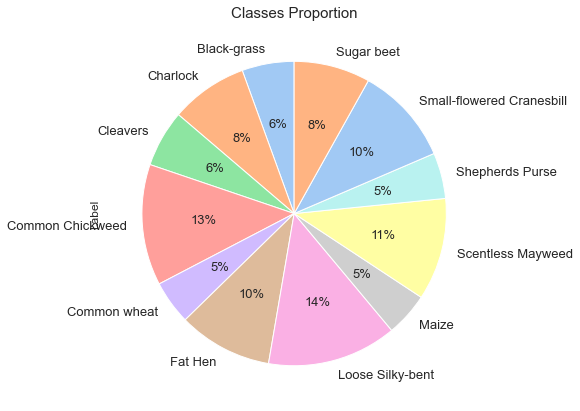

<IPython.core.display.Javascript object>

In [7]:
# Plot classes proportion
labels.groupby("Label")["Label"].size().plot.pie(
    autopct="%0.0f%%",
    figsize=(7, 7),
    textprops={"fontsize": 13},
    colors=sns.color_palette("pastel"),
    # rotatelabels=True,
    startangle=90,
)
plt.title("Classes Proportion", size=15)
plt.show()

#### Observation : 
1. There are 4750 images with shape 128 X 128 X 3
2. Images has 128 * 128 pixels with three channels (RGB)
3. There are 12 distinct labels
4. The seedling "Loose Silky-bent" has highest proportion 14% (654), followed by "Common Chickweed" with 13% (611) and "Scentless Mayweed" with 11% (516)
5. The seedlings "Common wheat", "Shepherds Purse" and "Maize" has least proportion of 5% (221)
6. Data is imbalanced


### 4. Plot Images <a id='4. Plot Images'></a>

In [8]:
# Get unique label names for each plant seedling
labels["Label"].unique()

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

<IPython.core.display.Javascript object>

In [9]:
# Create function to plot images
def plot_images(image_version, plant_name):
    plt.figure(figsize=(30, 30))

    index_value = list(labels[labels["Label"] == plant_name].index)[0:4]

    for i, variable in enumerate(index_value):
        plt.subplot(1, 4, i + 1)
        plt.imshow(image_version[variable], interpolation="nearest")
        plt.grid(False)

        plt.title(plant_name + " - index# " + str(variable))
        # plt.suptitle(plant_name)
        plt.tight_layout()

    plt.rc("axes", titlesize=30)  # fontsize of the axes title
    plt.rc("xtick", labelsize=20)  # fontsize of the tick labels
    plt.rc("ytick", labelsize=20)  # fontsize of the tick labels
    plt.show()

<IPython.core.display.Javascript object>

#### A. Plot "Small-flowered Cranesbill"

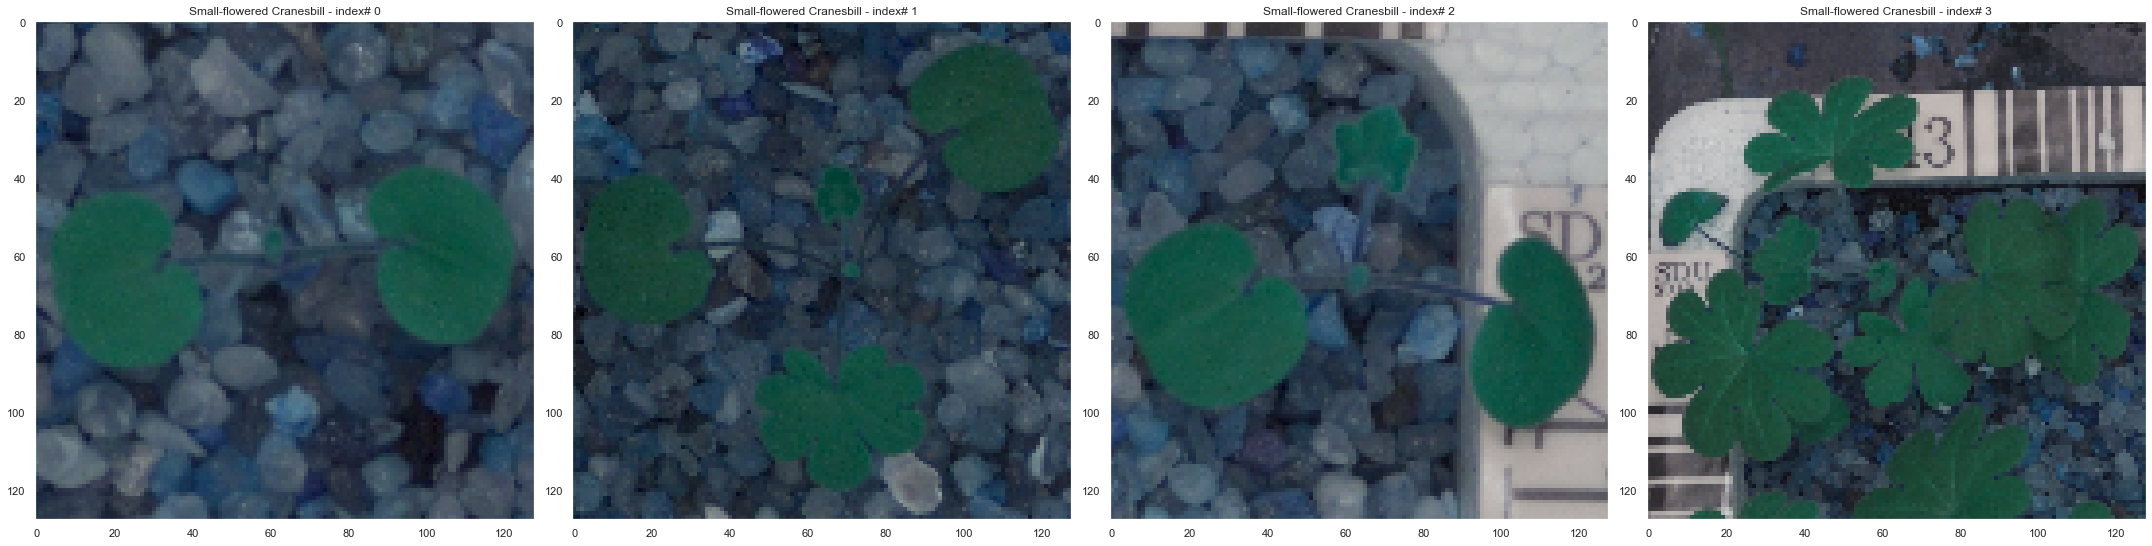

<IPython.core.display.Javascript object>

In [10]:
# Plot images
plot_images(images, "Small-flowered Cranesbill")

#### B. Plot "Fat Hen"

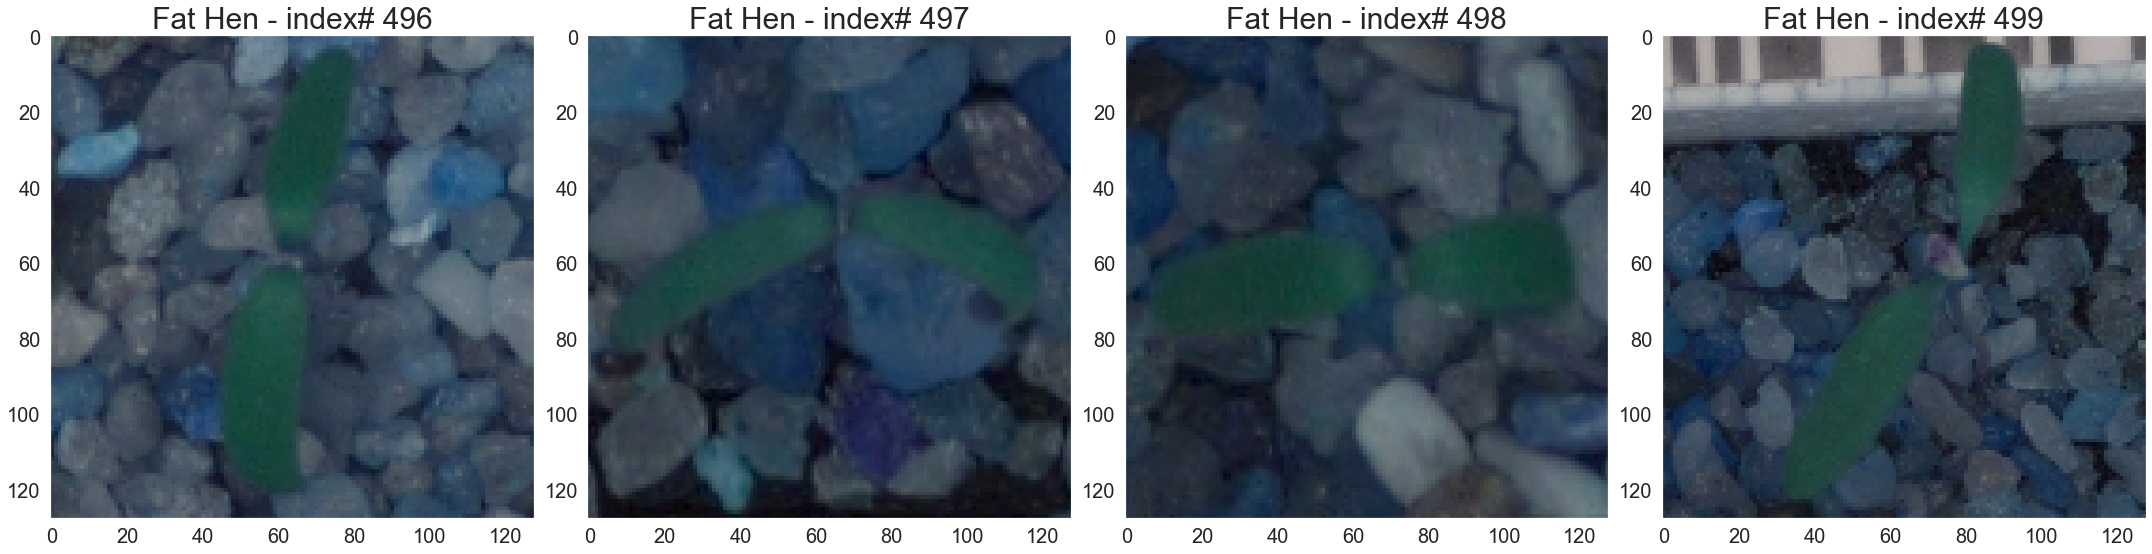

<IPython.core.display.Javascript object>

In [11]:
# Plot images
plot_images(images, "Fat Hen")

#### C. Plot "Shepherds Purse"

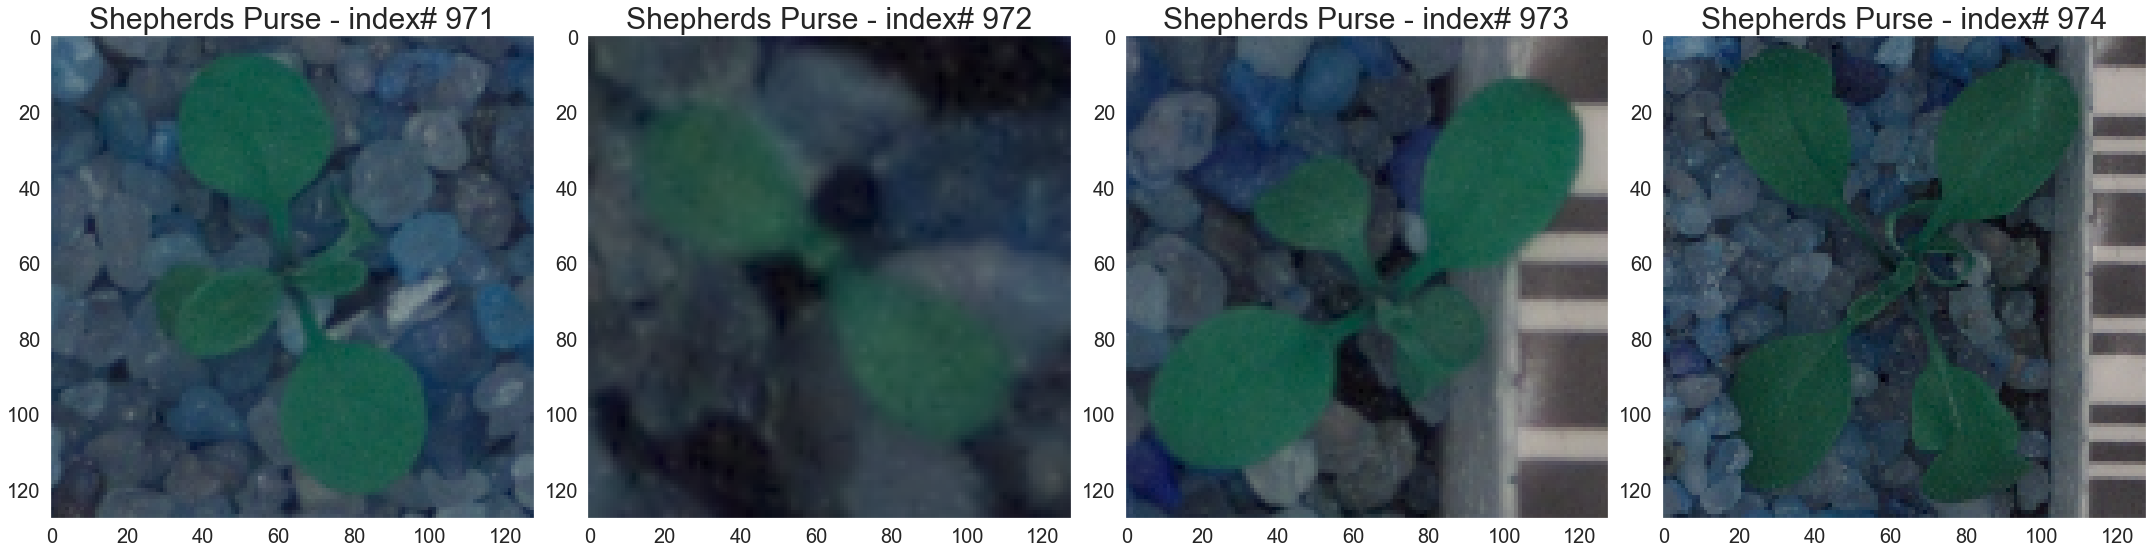

<IPython.core.display.Javascript object>

In [12]:
# Plot images
plot_images(images, "Shepherds Purse")

#### D. Plot "Common wheat"

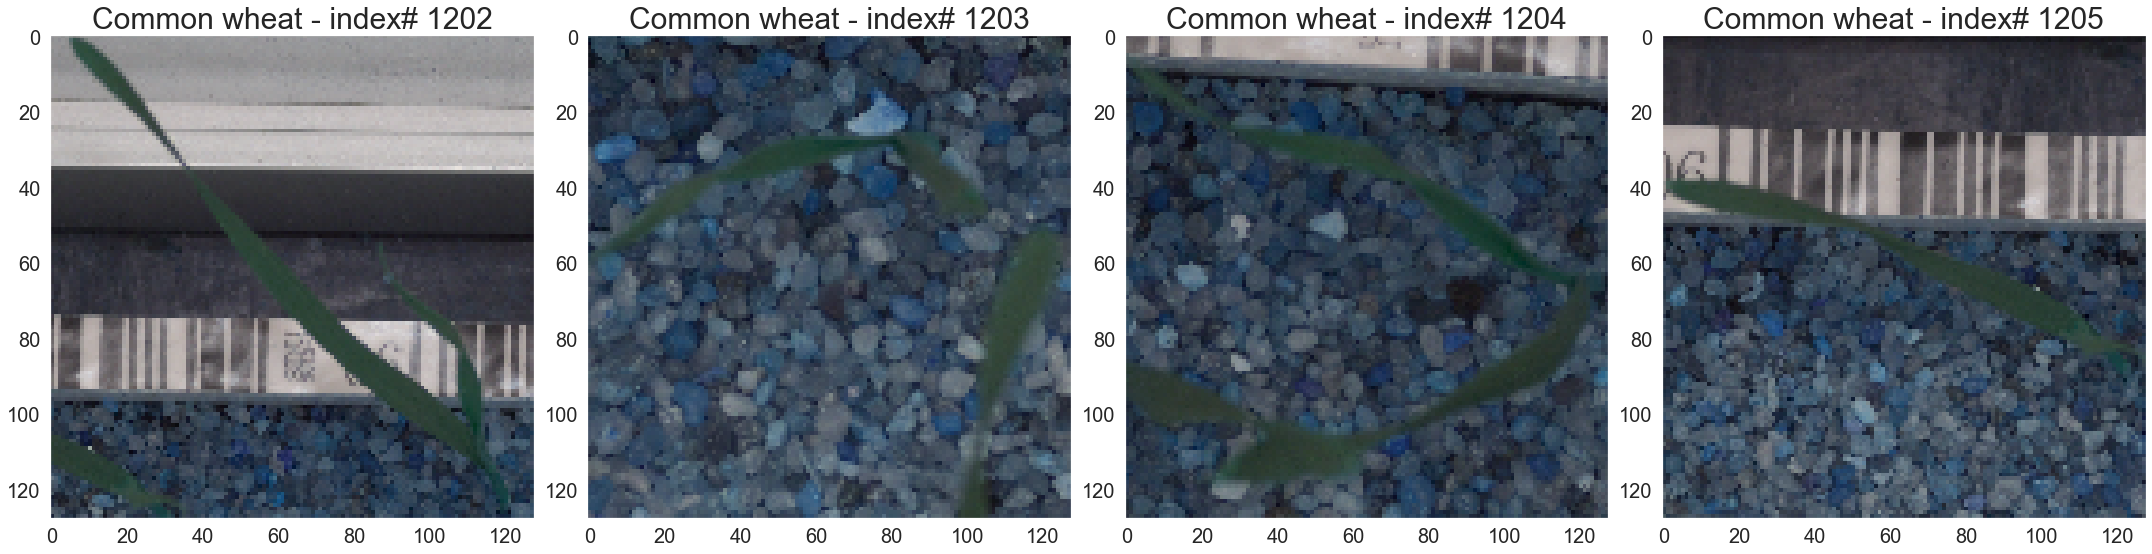

<IPython.core.display.Javascript object>

In [13]:
# Plot images
plot_images(images, "Common wheat")

#### E. Plot "Common Chickweed"

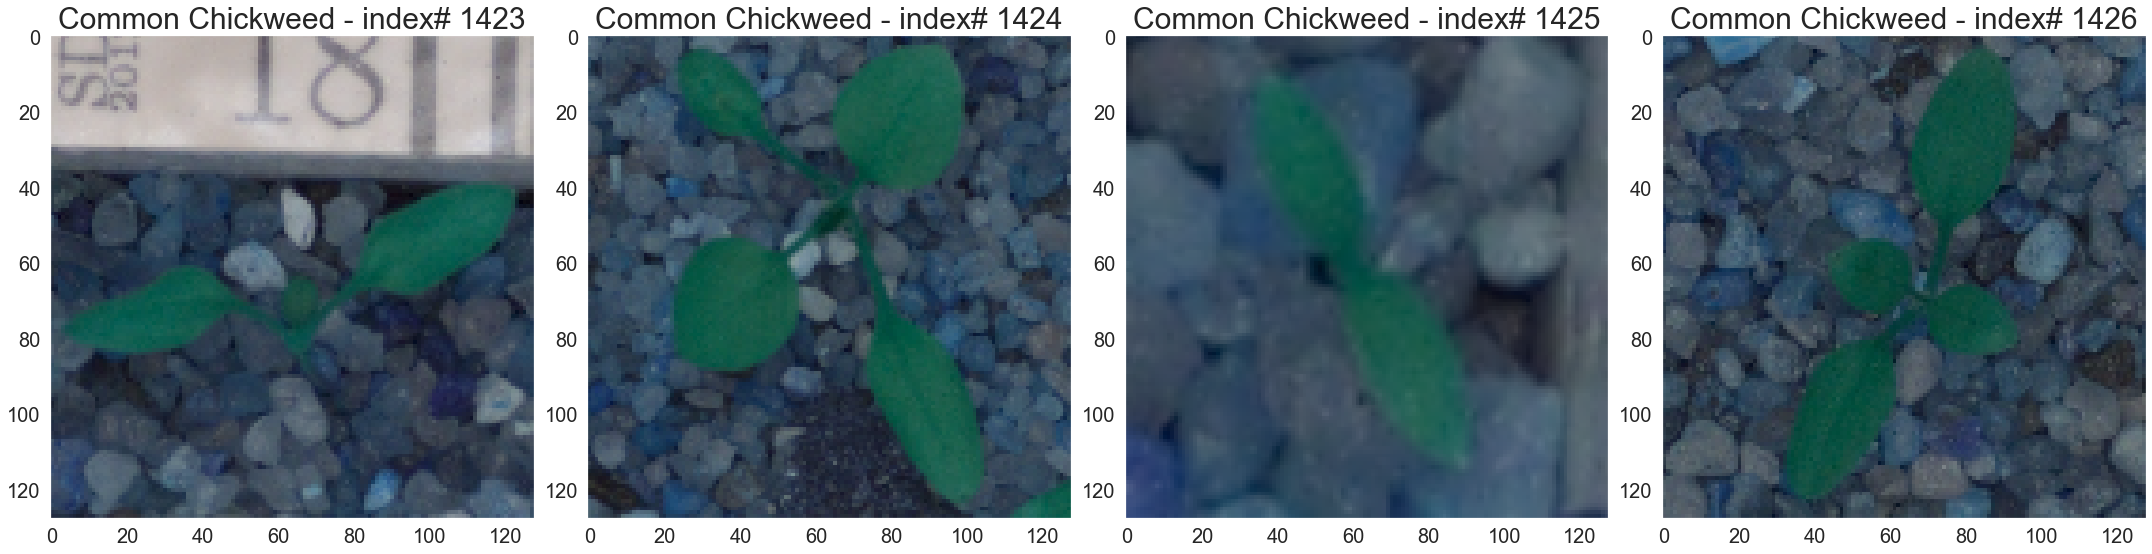

<IPython.core.display.Javascript object>

In [14]:
# Plot images
plot_images(images, "Common Chickweed")

#### F. Plot "Charlock"

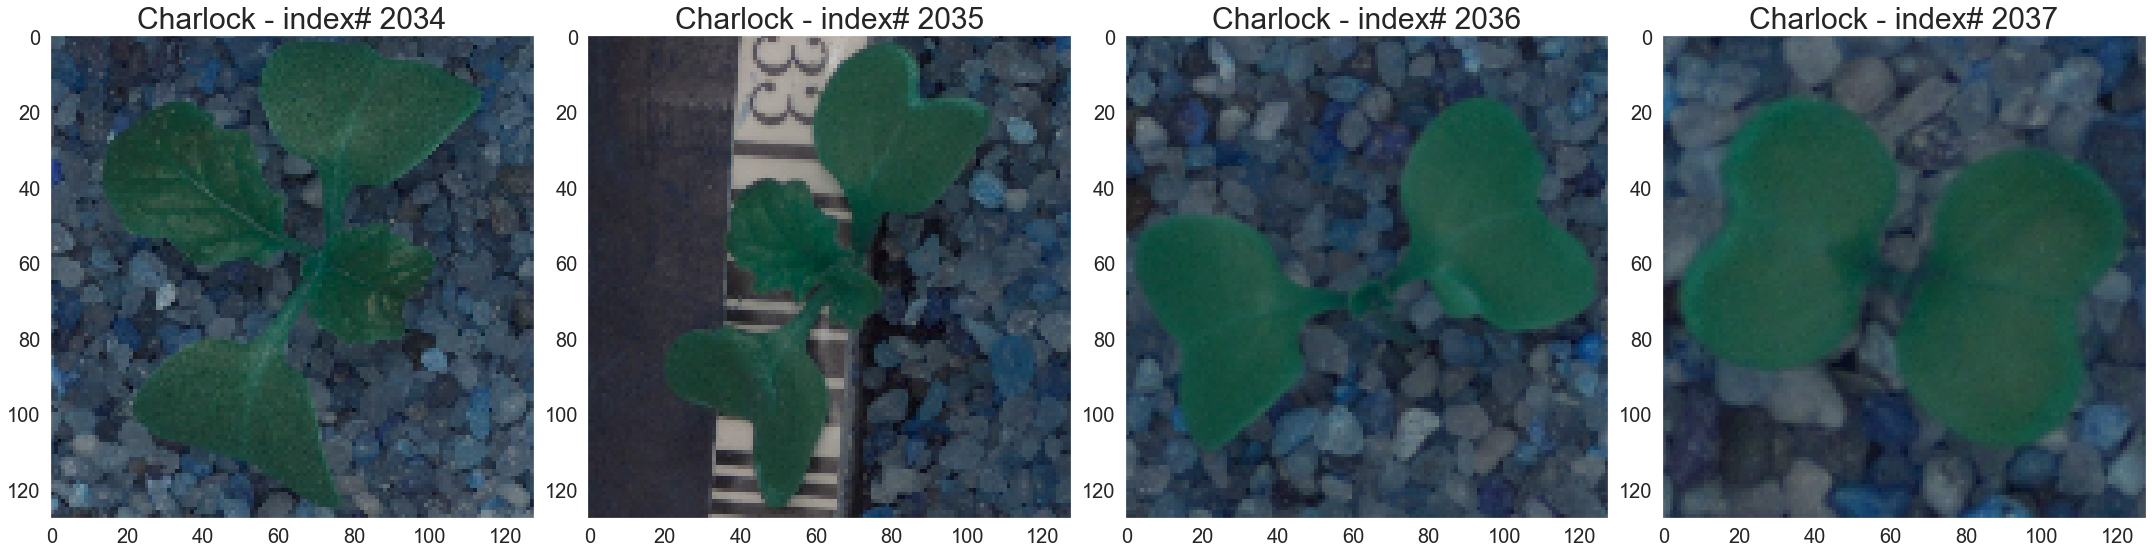

<IPython.core.display.Javascript object>

In [15]:
# Plot images
plot_images(images, "Charlock")

#### G. Plot "Cleavers"

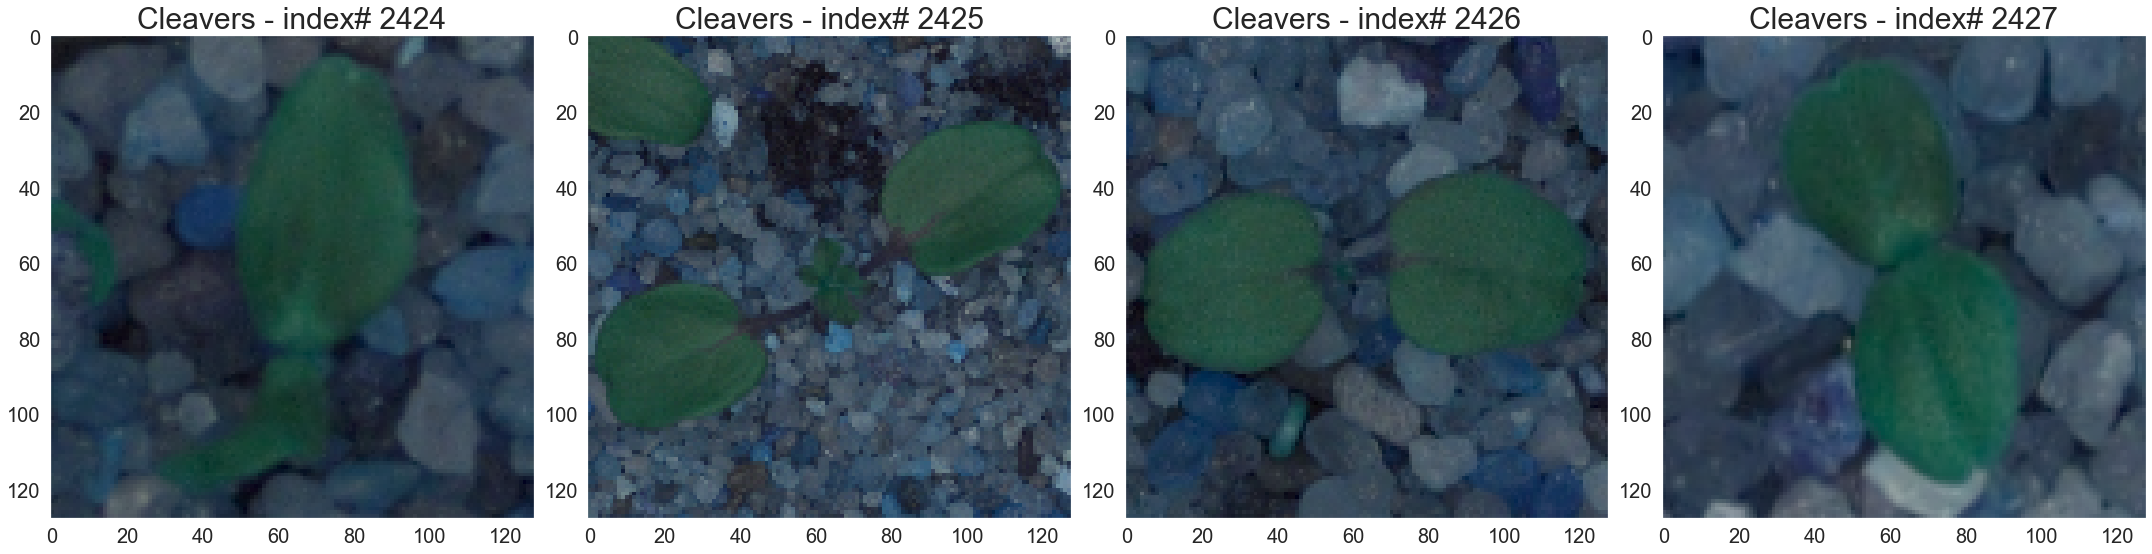

<IPython.core.display.Javascript object>

In [16]:
# Plot images
plot_images(images, "Cleavers")

#### H. Plot "Scentless Mayweed"

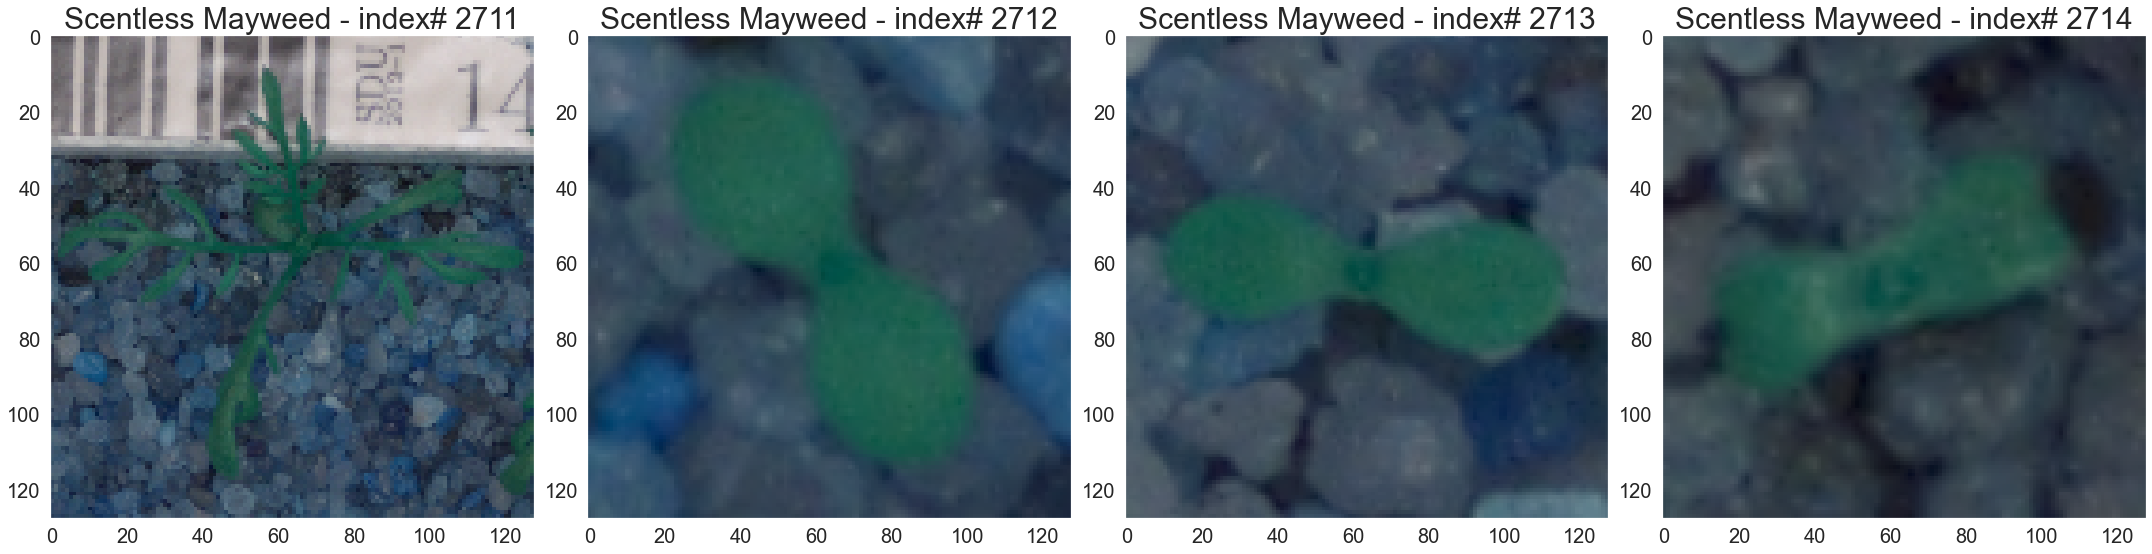

<IPython.core.display.Javascript object>

In [17]:
# Plot images
plot_images(images, "Scentless Mayweed")

#### I. Plot "Sugar beet"

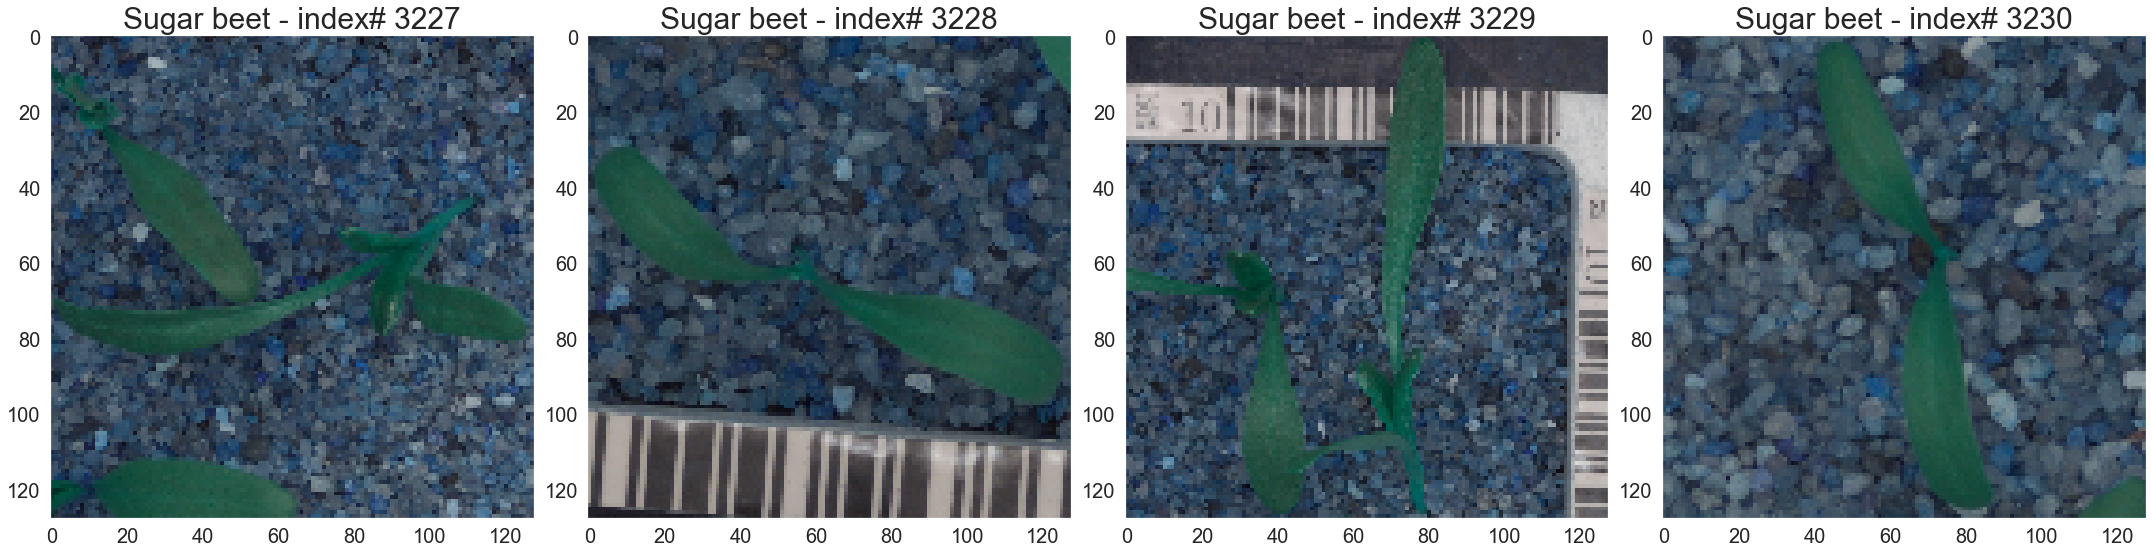

<IPython.core.display.Javascript object>

In [18]:
# Plot images
plot_images(images, "Sugar beet")

#### J. Plot "Maize"

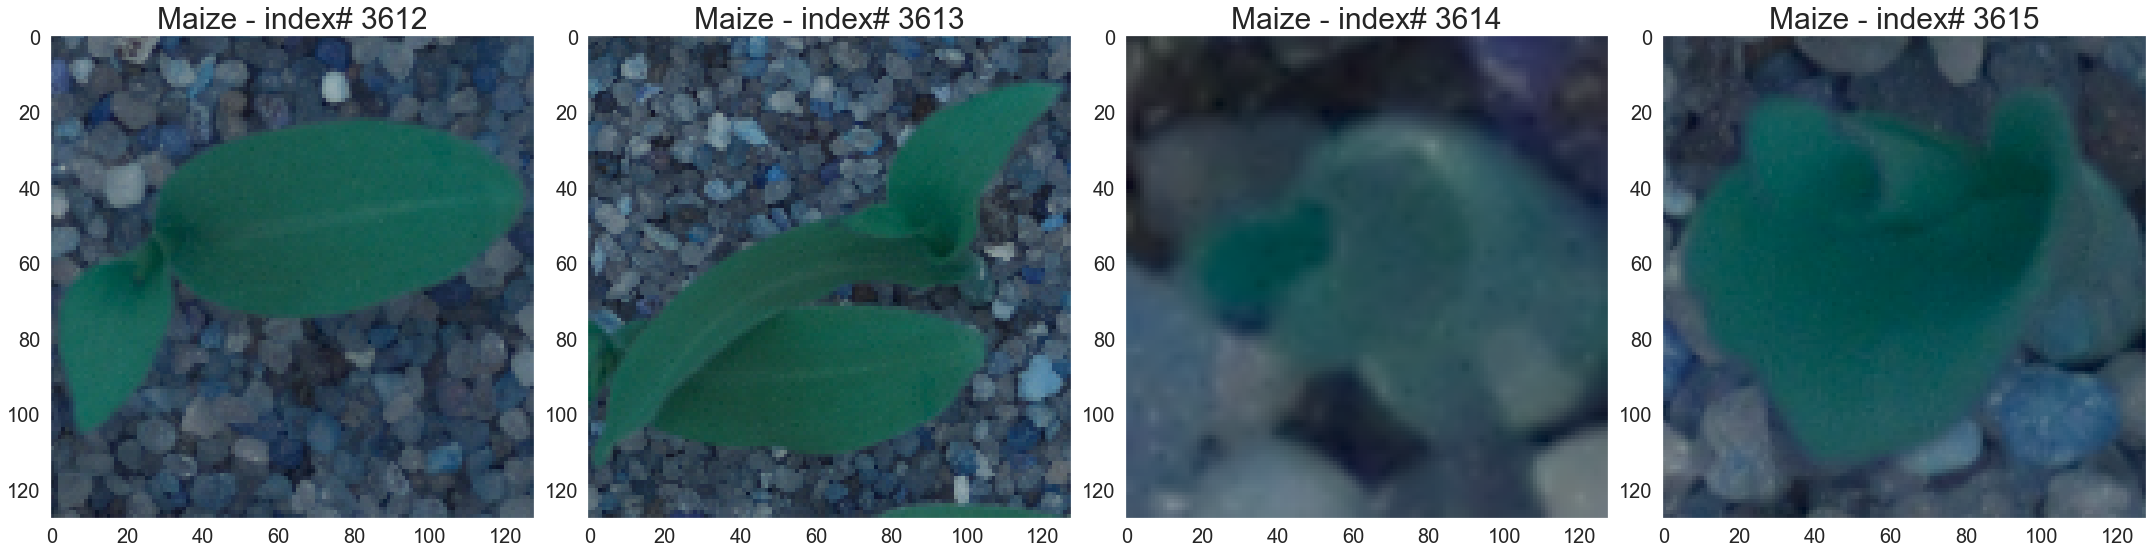

<IPython.core.display.Javascript object>

In [19]:
# Plot images
plot_images(images, "Maize")

#### K. Plot "Black-grass"

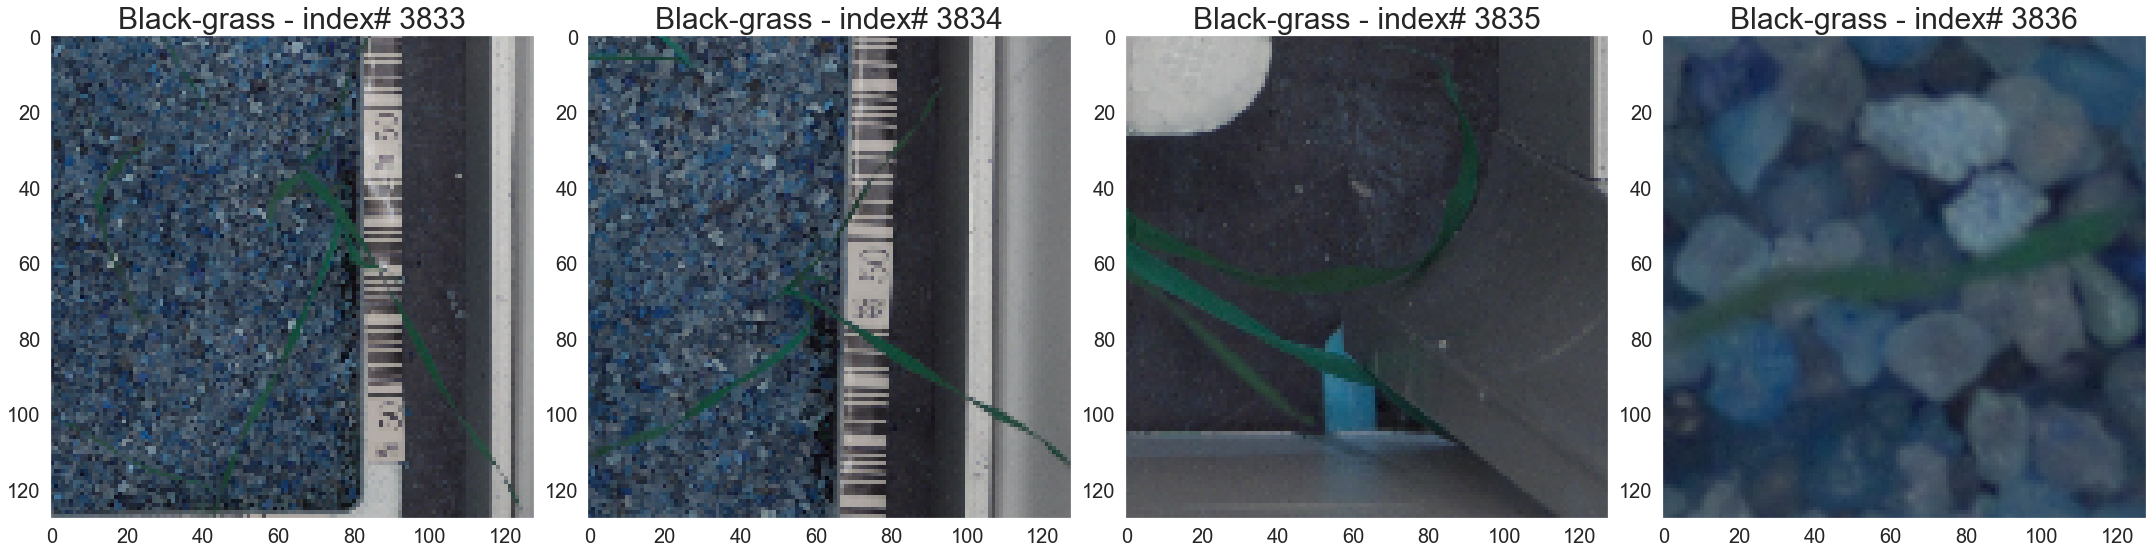

<IPython.core.display.Javascript object>

In [20]:
# Plot images
plot_images(images, "Black-grass")

#### L. Plot "Loose Silky-bent"

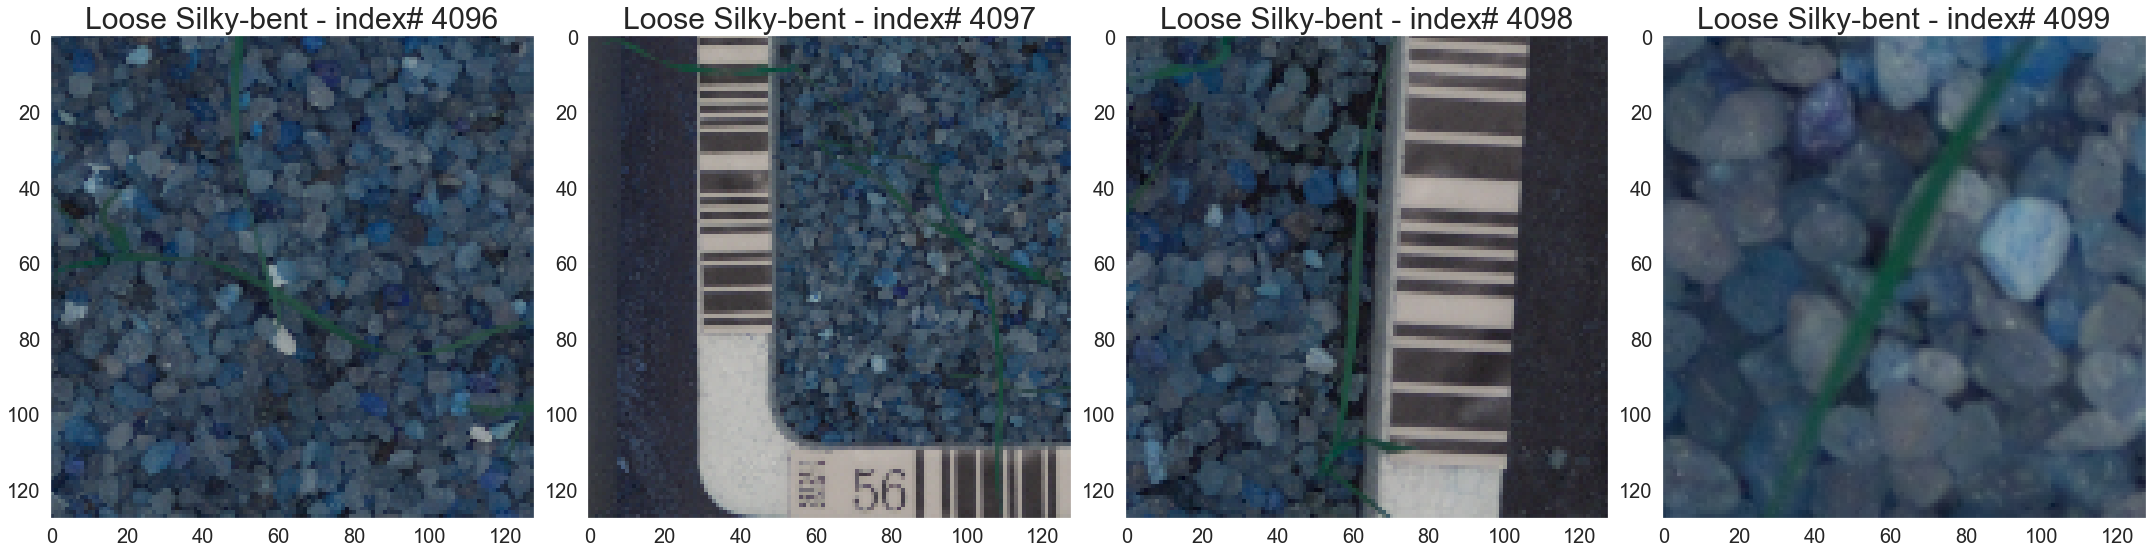

<IPython.core.display.Javascript object>

In [21]:
# Plot images
plot_images(images, "Loose Silky-bent")

In [22]:
# Create function to plot images
def plot_images_each(image_version, channels=3, pixels=128):
    plt.figure(figsize=(25, 25))
    # plt.tight_layout()

    for i, plant_name in enumerate(labels["Label"].unique()):

        plt.subplot(3, 4, i + 1)

        index_value = list(labels[labels["Label"] == plant_name].index[0:1])[0]

        if channels == 3:
            plt.imshow(
                np.reshape(image_version[index_value], (pixels, pixels, channels)),
                interpolation="nearest",
            )
        else:
            plt.imshow(
                np.reshape(image_version[index_value], (pixels, pixels)),
                interpolation="nearest",
            )

        plt.grid(False)

        plt.title(plant_name, fontsize=25)

    plt.rc("axes", titlesize=25)  # fontsize of the axes title
    plt.rc("xtick", labelsize=15)  # fontsize of the tick labels
    plt.rc("ytick", labelsize=15)  # fontsize of the tick labels
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

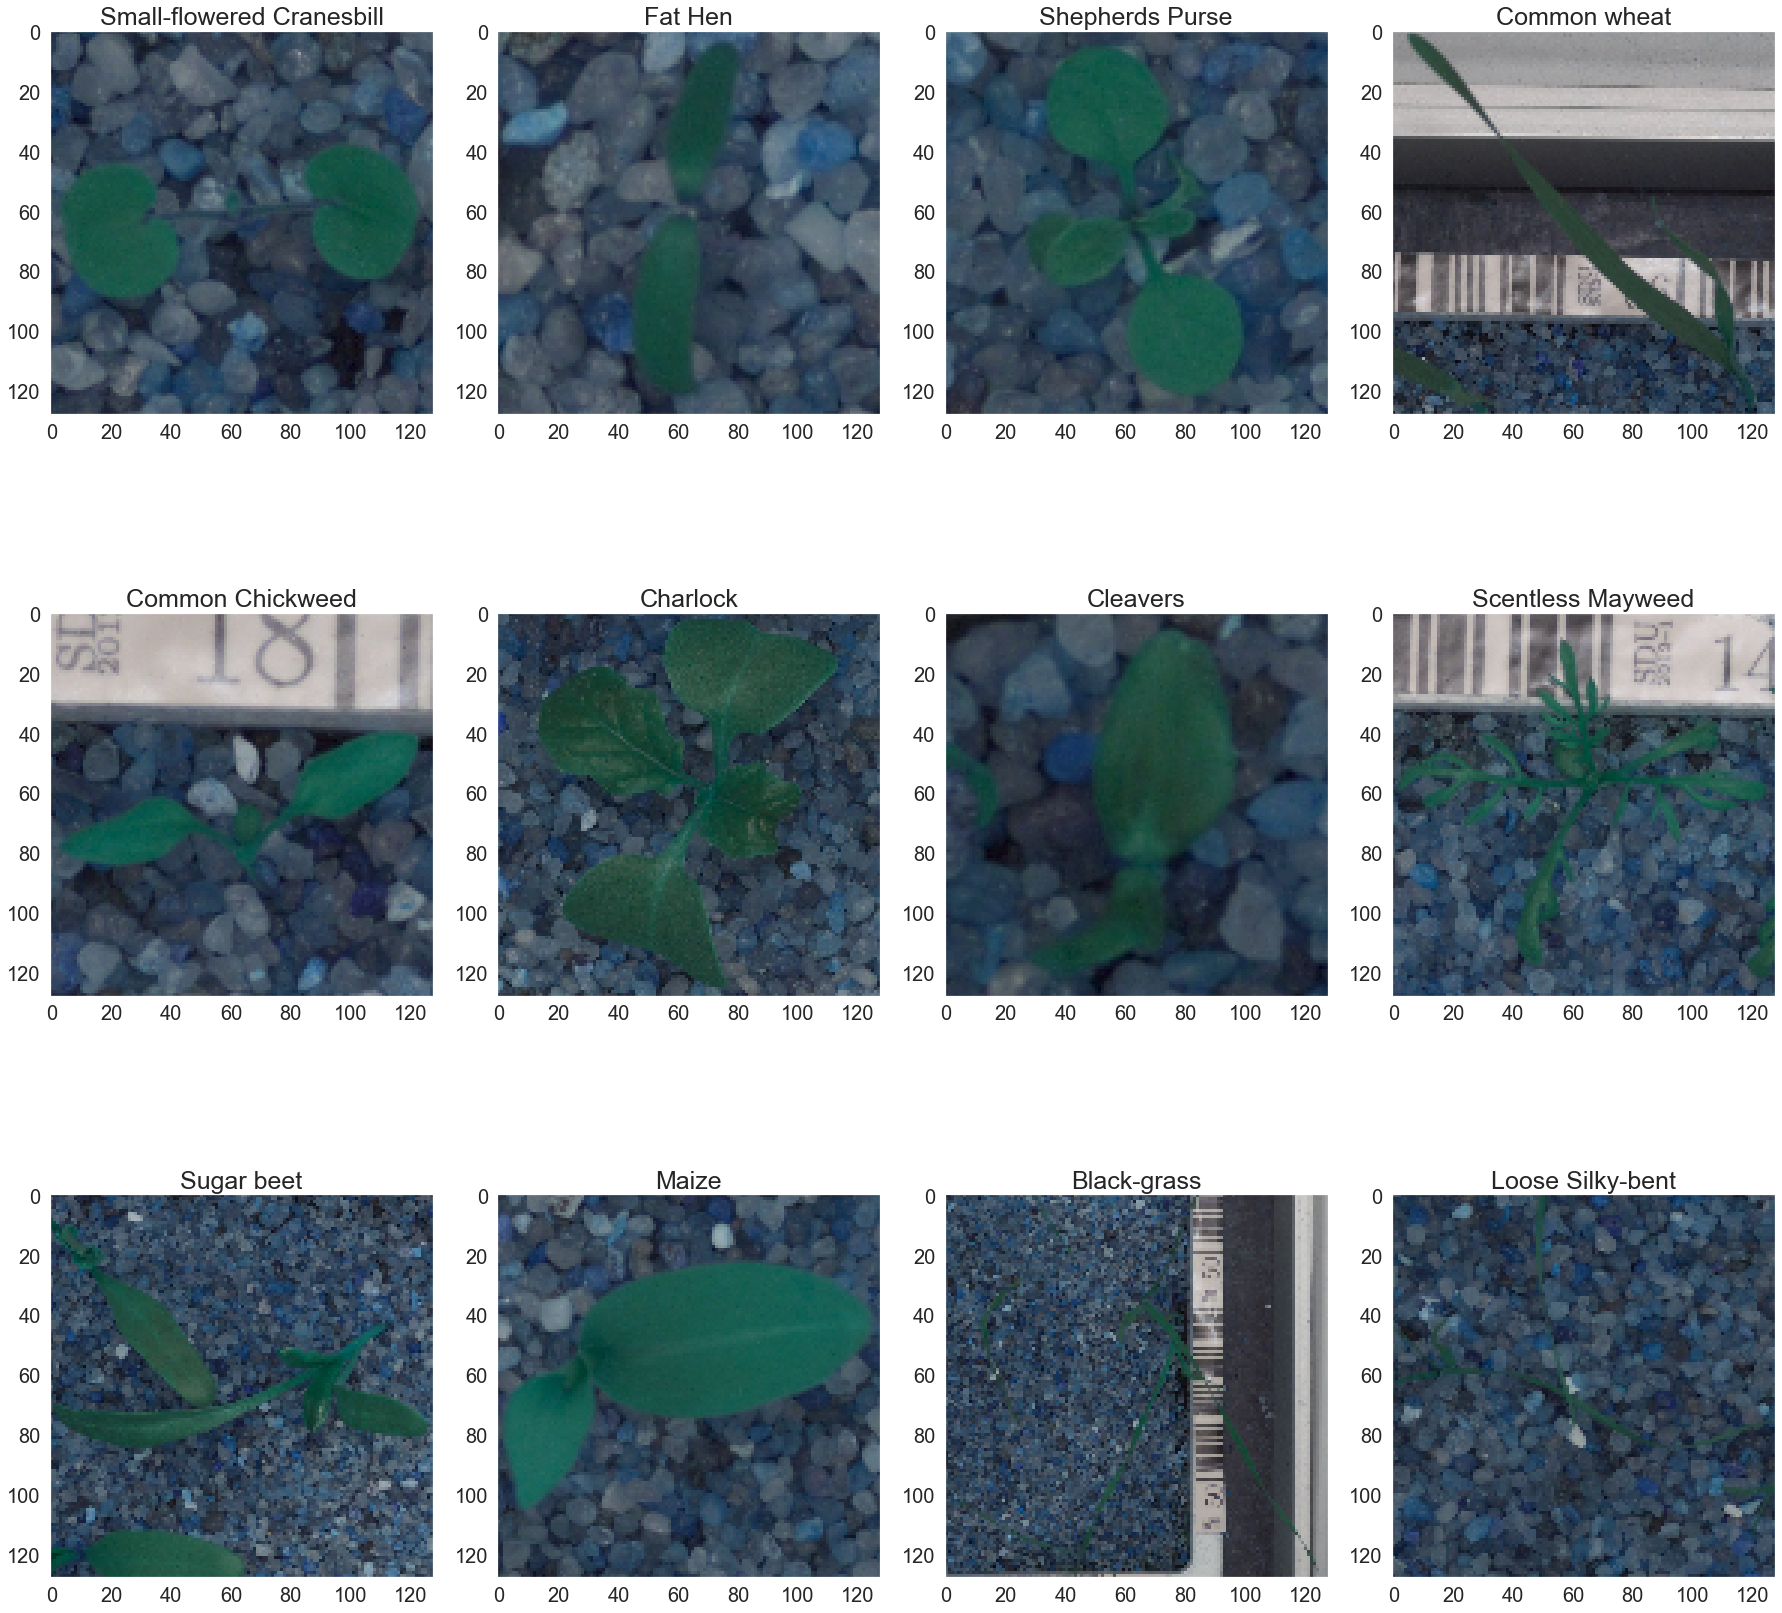

<IPython.core.display.Javascript object>

In [23]:
# Plot one sample from each of 12 seedlings
plot_images_each(images)

#### Observation : 
1. Images are in color. Probably in RGB channel
2. Images doesnt have brightness and clarity
3. Few images are out of focus and plant seedlings are not cleary distinguishable
4. There are seedlings which look similar even to human eye. For example, "Loose Silky-bent" and "Black-grass" looks similar. However, proportion of "Loose Silky-bent" is way more than "Black-grass"
5. Certain seedlings looks different within themselves. For example, "Scentless Mayweed"


### 5. Exploratory Data Analysis <a id='5. Exploratory Data Analysis'></a>

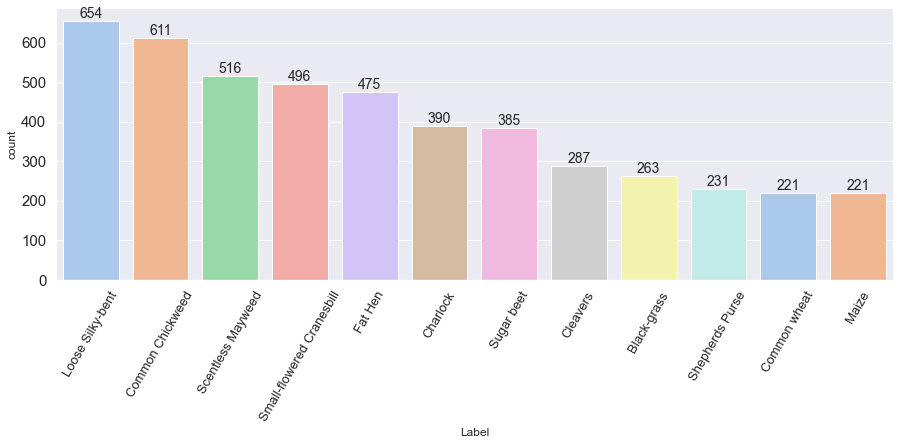

<IPython.core.display.Javascript object>

In [24]:
# Plot count of each classes
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    data=labels,
    x="Label",
    palette="pastel",
    order=labels["Label"].value_counts().index[:12],
    # figsize=(12, 7),
)
plt.xticks(rotation=60, fontsize=13)
ax.bar_label(ax.containers[0], fontsize=14)
# plt.rc("axes", titlesize=30)  # fontsize of the axes title
plt.rc("xtick", labelsize=14)  # fontsize of the tick labels
plt.rc("ytick", labelsize=14)  # fontsize of the tick labels
plt.show()

#### Observation : 
1. There are 4750 images with shape 128 X 128 X 3
2. Images has 128 * 128 pixels with three channels (RGB)
3. There are 12 distinct labels
4. The seedling "Loose Silky-bent" has highest proportion 14% (654), followed by "Common Chickweed" with 13% (611) and "Scentless Mayweed" with 11% (516)
5. The seedlings "Common wheat", "Shepherds Purse" and "Maize" has least proportion of 5% (221)
6. Data is imbalanced


### 6. Exploratory Deep Dive <a id='6. Exploratory Deep Dive'></a>
Lets pick one image and check its format and explore ways to extract relevant information for model building

In [25]:
# Check shape of image
images[0].shape

(128, 128, 3)

<IPython.core.display.Javascript object>

In [26]:
# To verify whether images are in RGB format
Image.fromarray(images[0]).mode

'RGB'

<IPython.core.display.Javascript object>

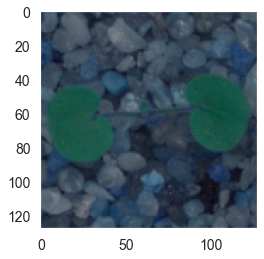

<IPython.core.display.Javascript object>

In [27]:
# Lets take sample image at index 0
plt.imshow(images[0])
plt.grid(visible=False)

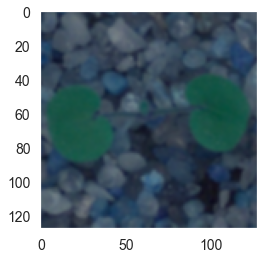

<IPython.core.display.Javascript object>

In [28]:
# Lets do gaussian blurr to help reduce noise or unwanted variances of an image
image_blurr = cv2.GaussianBlur(images[0], ksize=(3, 3), sigmaX=0)
plt.imshow(image_blurr)
plt.grid(visible=False)

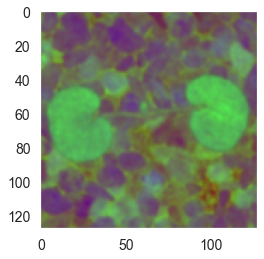

<IPython.core.display.Javascript object>

In [29]:
# Lets do RGB to HSV channel conversion because HSV is more robust towards external lighting changes
image_hsv = cv2.cvtColor(image_blurr, cv2.COLOR_RGB2HSV)
plt.imshow(image_hsv)
plt.grid(visible=False)

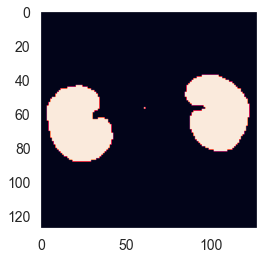

<IPython.core.display.Javascript object>

In [30]:
# Lets do inRange to extract green spectrum of the image which represents plant seedlings.
# This also eliminates background information which is irrelevant for model building
# lower_green = np.array([5, 100, 5])
# upper_green = np.array([95, 255, 255])
# lower_green = np.array([0, 100, 0])
# upper_green = np.array([90, 255, 255])
lower_green = np.array([0, 100, 0])
upper_green = np.array([90, 255, 255])
image_mask = cv2.inRange(image_hsv, lower_green, upper_green)
plt.imshow(image_mask)
plt.grid(visible=False)

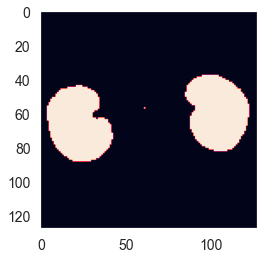

<IPython.core.display.Javascript object>

In [31]:
# Lets apply Morphological transformations for better identification of plant seedling part
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
image_mask_2 = cv2.morphologyEx(image_mask, cv2.MORPH_CLOSE, kernel)
plt.imshow(image_mask_2)
plt.grid(visible=False)

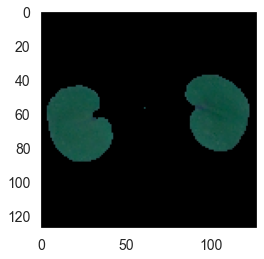

<IPython.core.display.Javascript object>

In [32]:
# Lets blend image mask onto original image to get plant seedling part alone
image_segment = cv2.bitwise_and(images[0], images[0], mask=image_mask_2)
plt.imshow(image_segment)
plt.grid(visible=False)

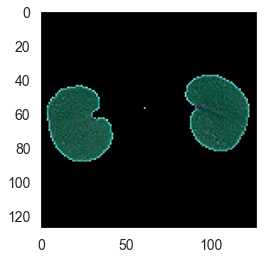

<IPython.core.display.Javascript object>

In [33]:
# Lets sharpen image to get more suitable plant seedling part
sharpen_filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
image_sharpen = cv2.filter2D(image_segment, -1, sharpen_filter)
plt.imshow(image_sharpen)
plt.grid(visible=False)

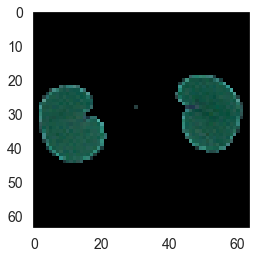

<IPython.core.display.Javascript object>

In [34]:
# lets re-size image to 64*64 to reduce model computational time
new_image = cv2.resize(image_sharpen, (64, 64), interpolation=cv2.INTER_AREA)
plt.imshow(new_image)
plt.grid(visible=False)

### 7. Insights Based On EDA<a id='7. Insights Based On EDA'></a>

#### Observation : 
1. There are 4750 images with shape 128 X 128 X 3
2. Images has 128 * 128 pixels with three channels (RGB)
3. There are 12 distinct labels
4. The seedling "Loose Silky-bent" has highest proportion 14% (654), followed by "Common Chickweed" with 13% (611) and "Scentless Mayweed" with 11% (516)
5. The seedlings "Common wheat", "Shepherds Purse" and "Maize" has least proportion of 5% (221)
6. Target data "Label" is imbalanced
7. Images are in color. Probably in RGB channel
8. Images doesnt have brightness and clarity
9. Few images are out of focus and plant seedlings are not cleary distinguishable
10. There are seedlings which look similar even to human eye. For example, "Loose Silky-bent" and "Black-grass" looks similar. However, proportion of "Loose Silky-bent" is way more than "Black-grass"
11. Certain seedlings looks different within themselves. For example, "Scentless Mayweed"




### 8. Data Preprocessing<a id='8. Data Preprocessing'></a>

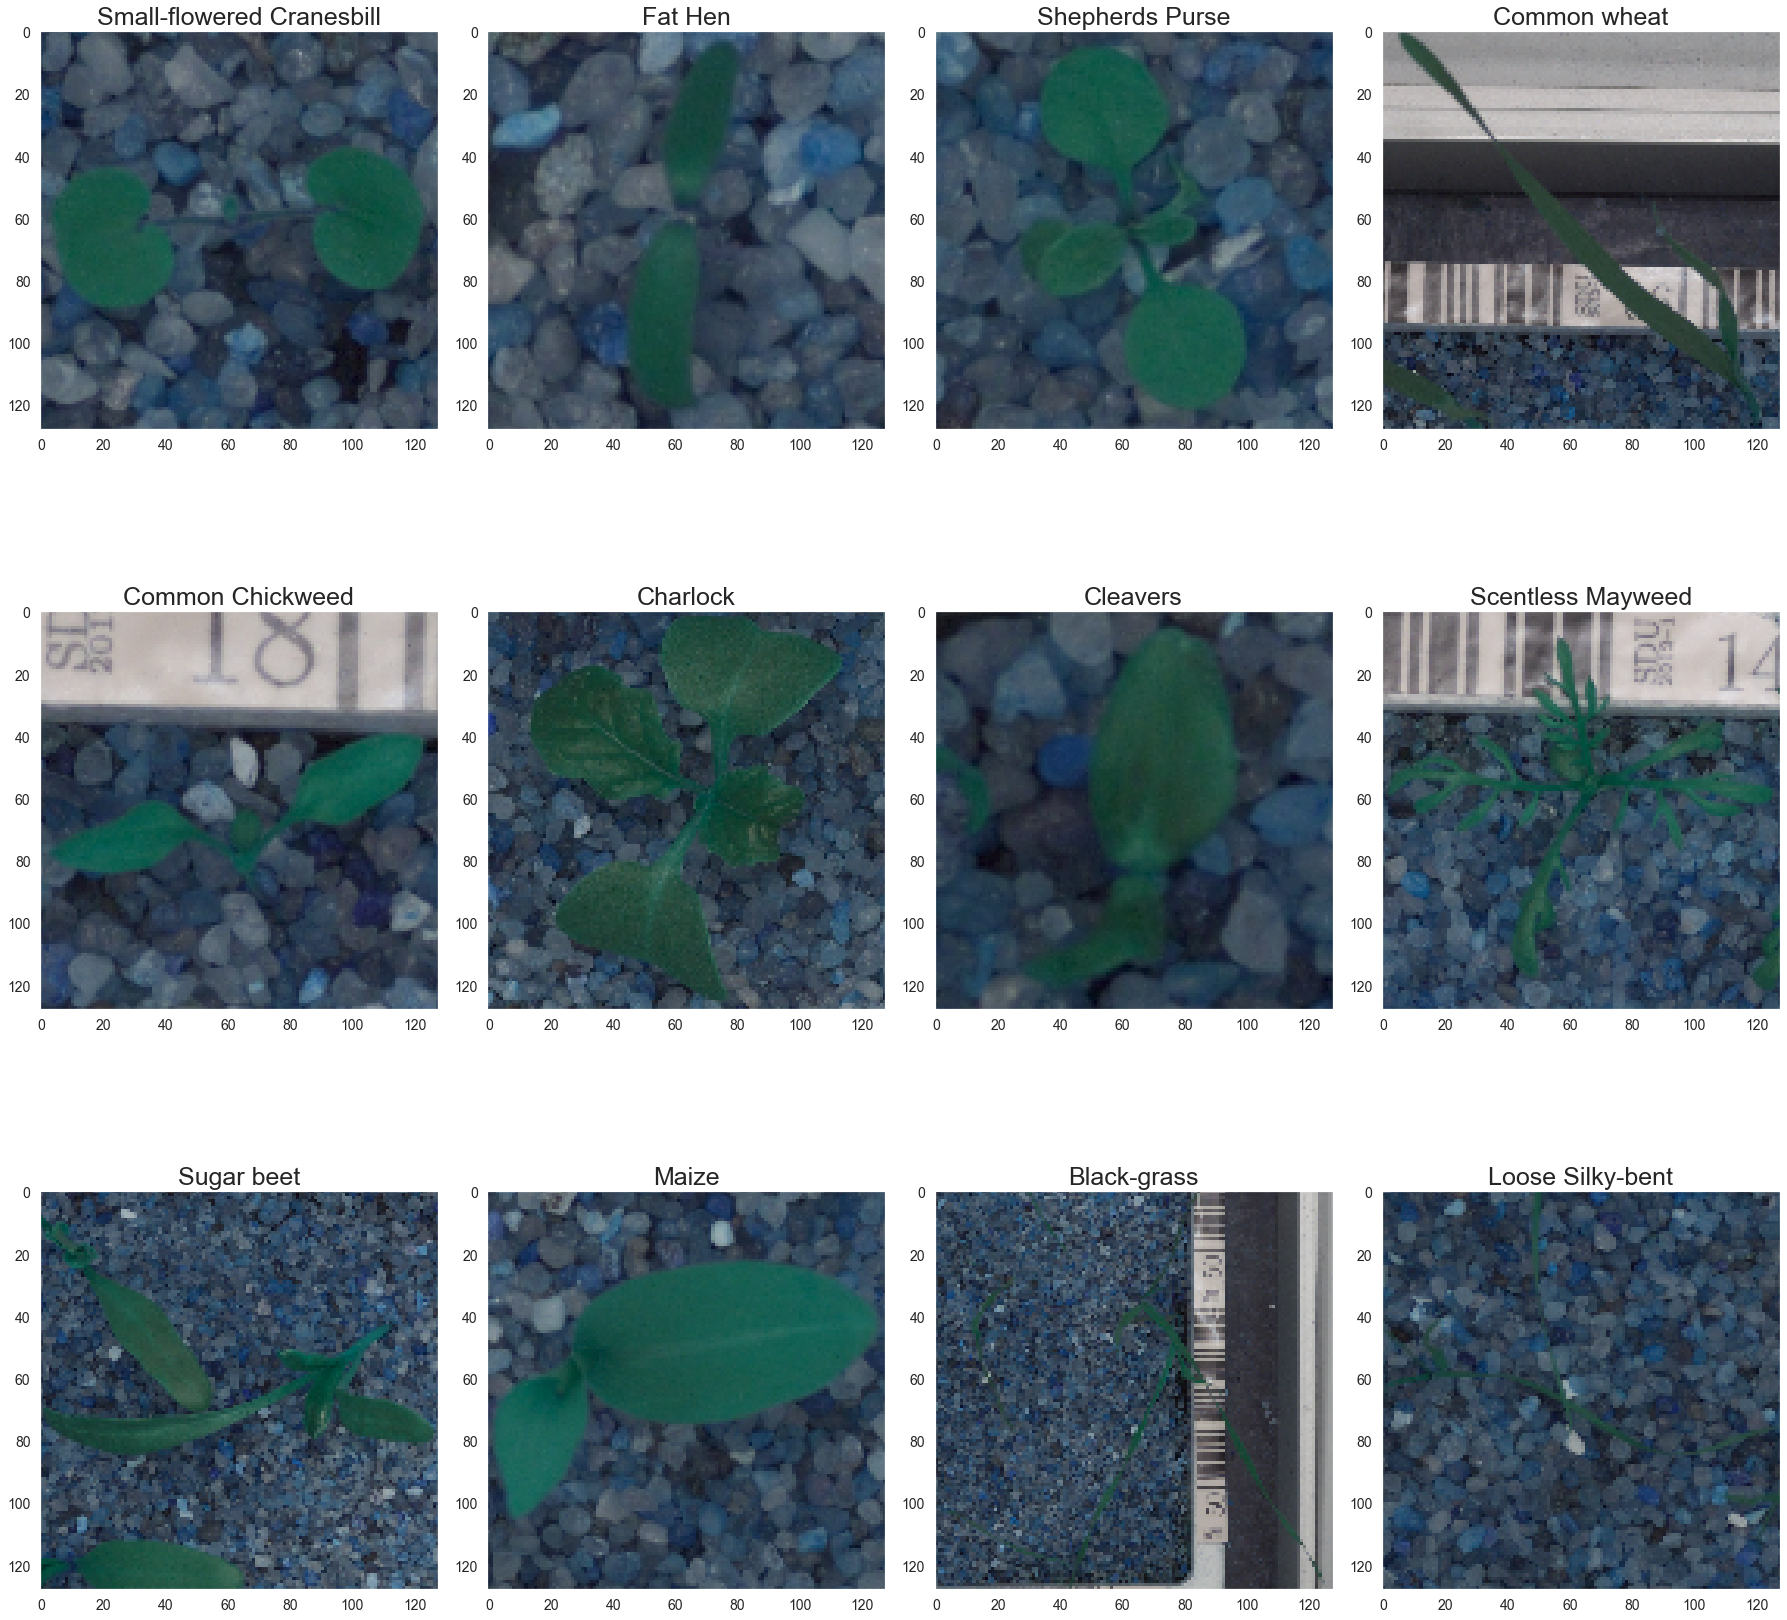

<IPython.core.display.Javascript object>

In [35]:
# Plot one sample from each of 12 seedlings
plot_images_each(images)

#### A. Apply Gaussian Blurring

In [36]:
# Applying Gaussian Blur to denoise the images
images_gb = []
for i in range(len(images)):
    images_gb.append(cv2.GaussianBlur(images[i], ksize=(3, 3), sigmaX=0))

<IPython.core.display.Javascript object>

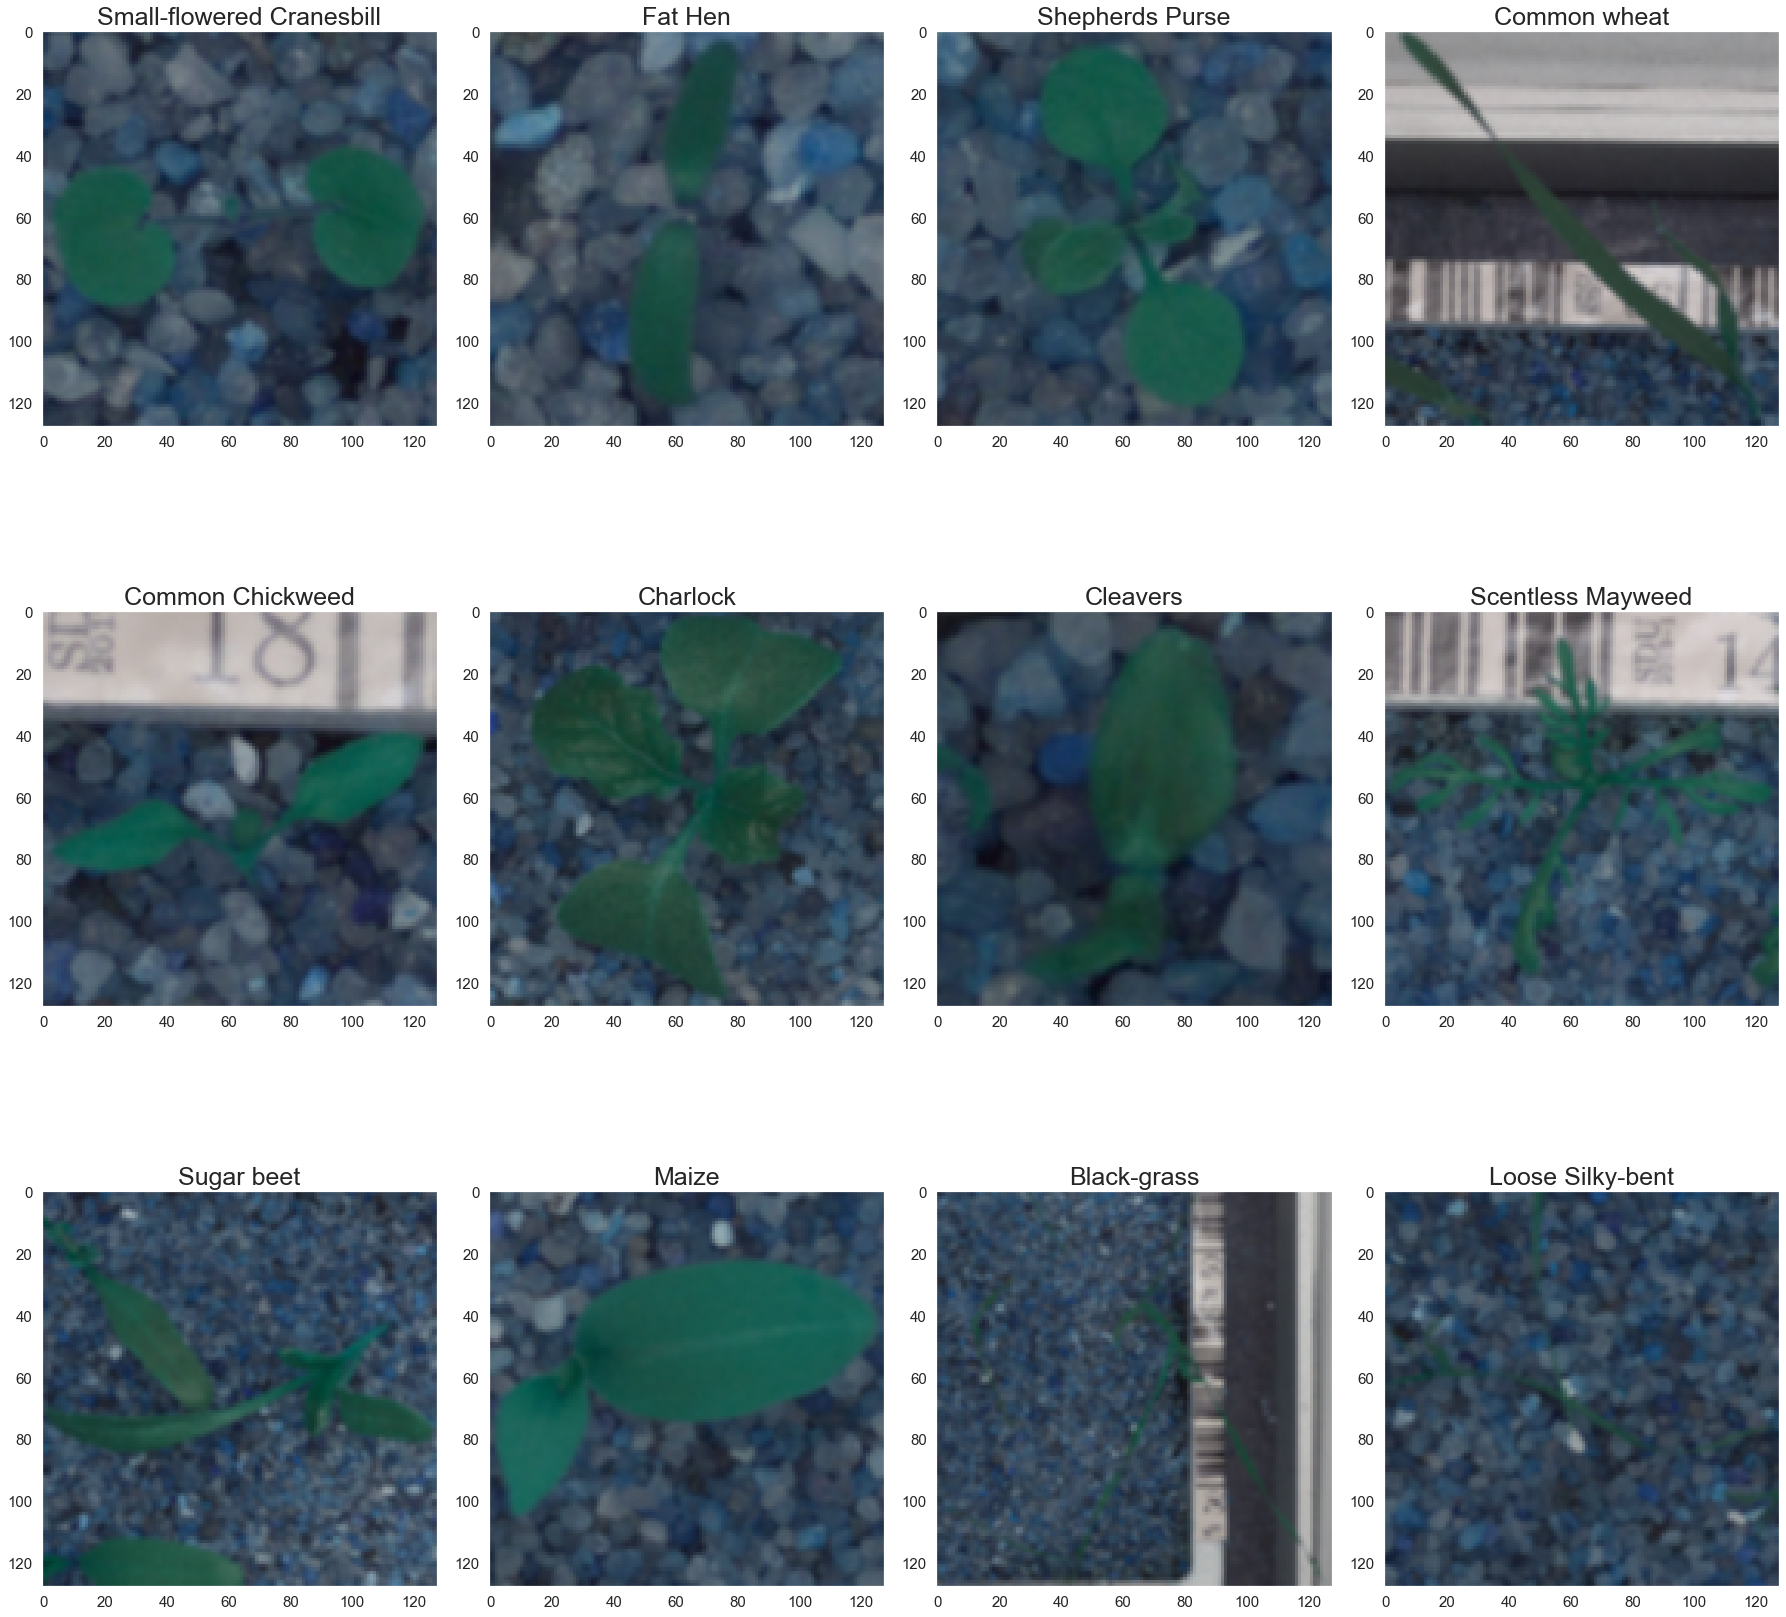

<IPython.core.display.Javascript object>

In [37]:
# Plot one sample from each of 12 seedlings
plot_images_each(images_gb)

#### B. Apply RGB to HSV Conversion

In [38]:
# Lets do RGB to HSV channel conversion because HSV is more robust towards external lighting changes
images_hsv = []
for i in range(len(images_gb)):
    images_hsv.append(cv2.cvtColor(images_gb[i], cv2.COLOR_RGB2HSV))

<IPython.core.display.Javascript object>

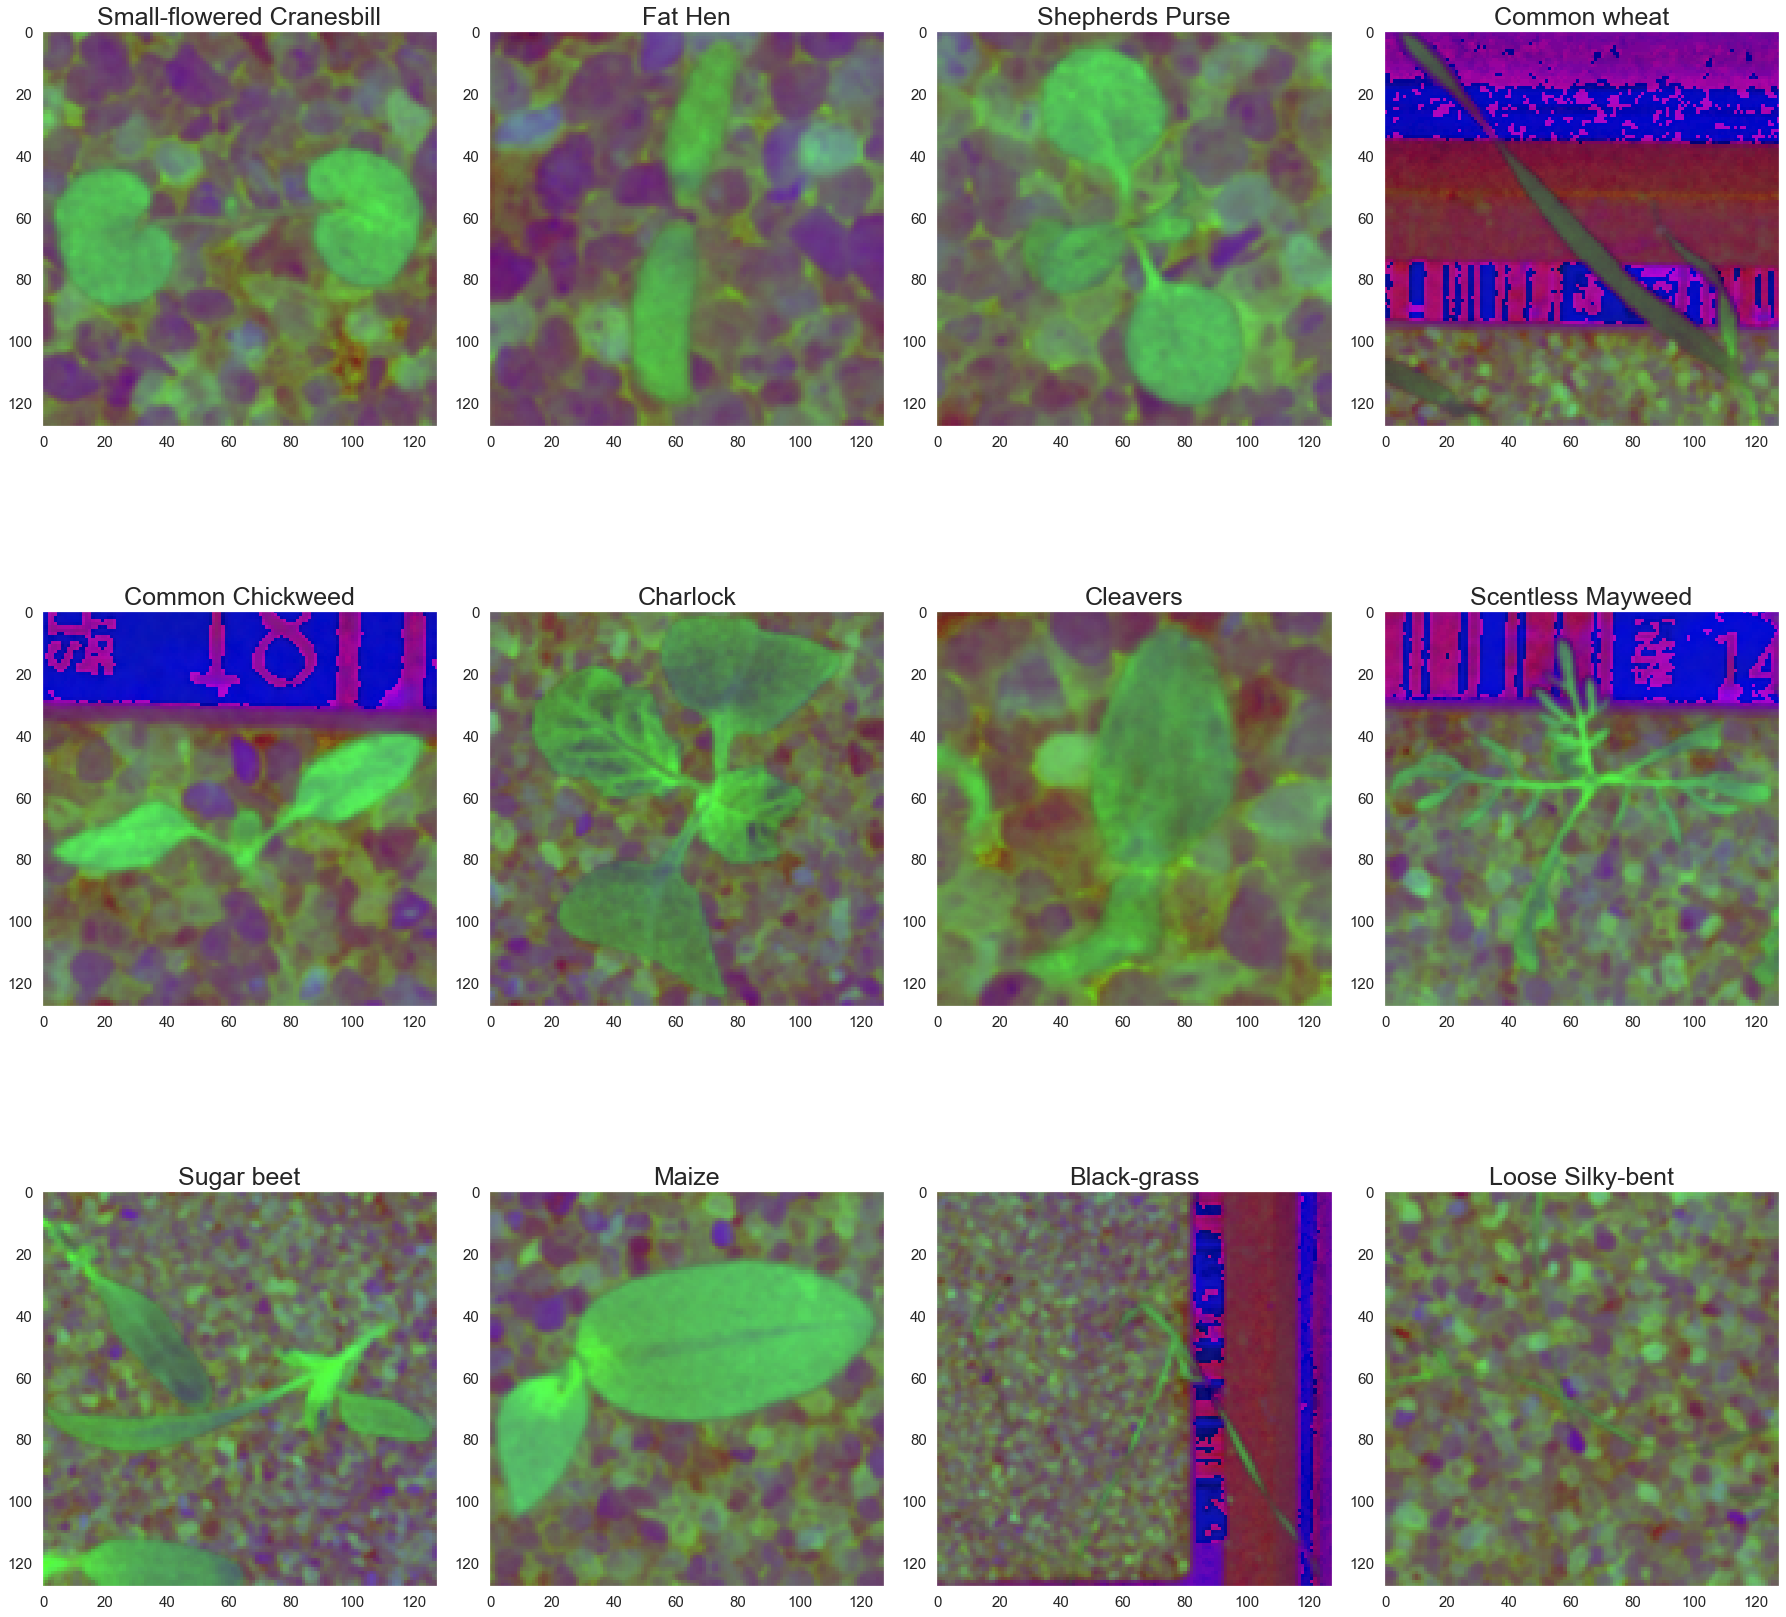

<IPython.core.display.Javascript object>

In [39]:
# Plot one sample from each of 12 seedlings
plot_images_each(images_hsv)

#### C. Apply Masking for Green spectrum

In [40]:
# Lets do inRange to extract green spectrum of the image which represents plant seedlings.
# This also eliminates background information which is irrelevant for model building
# lower_green = np.array([5, 100, 5])
# upper_green = np.array([95, 255, 255])
lower_green_1 = np.array([0, 100, 0])
upper_green_1 = np.array([90, 255, 255])
lower_green_2 = np.array([0, 20, 0])
upper_green_2 = np.array([90, 255, 255])
images_mask = []
for i in range(len(images_hsv)):
    if labels["Label"][i] in ["Common wheat", "Black-grass", "Loose Silky-bent"]:
        images_mask.append(cv2.inRange(images_hsv[i], lower_green_2, upper_green_2))
    else:
        images_mask.append(cv2.inRange(images_hsv[i], lower_green_1, upper_green_1))

<IPython.core.display.Javascript object>

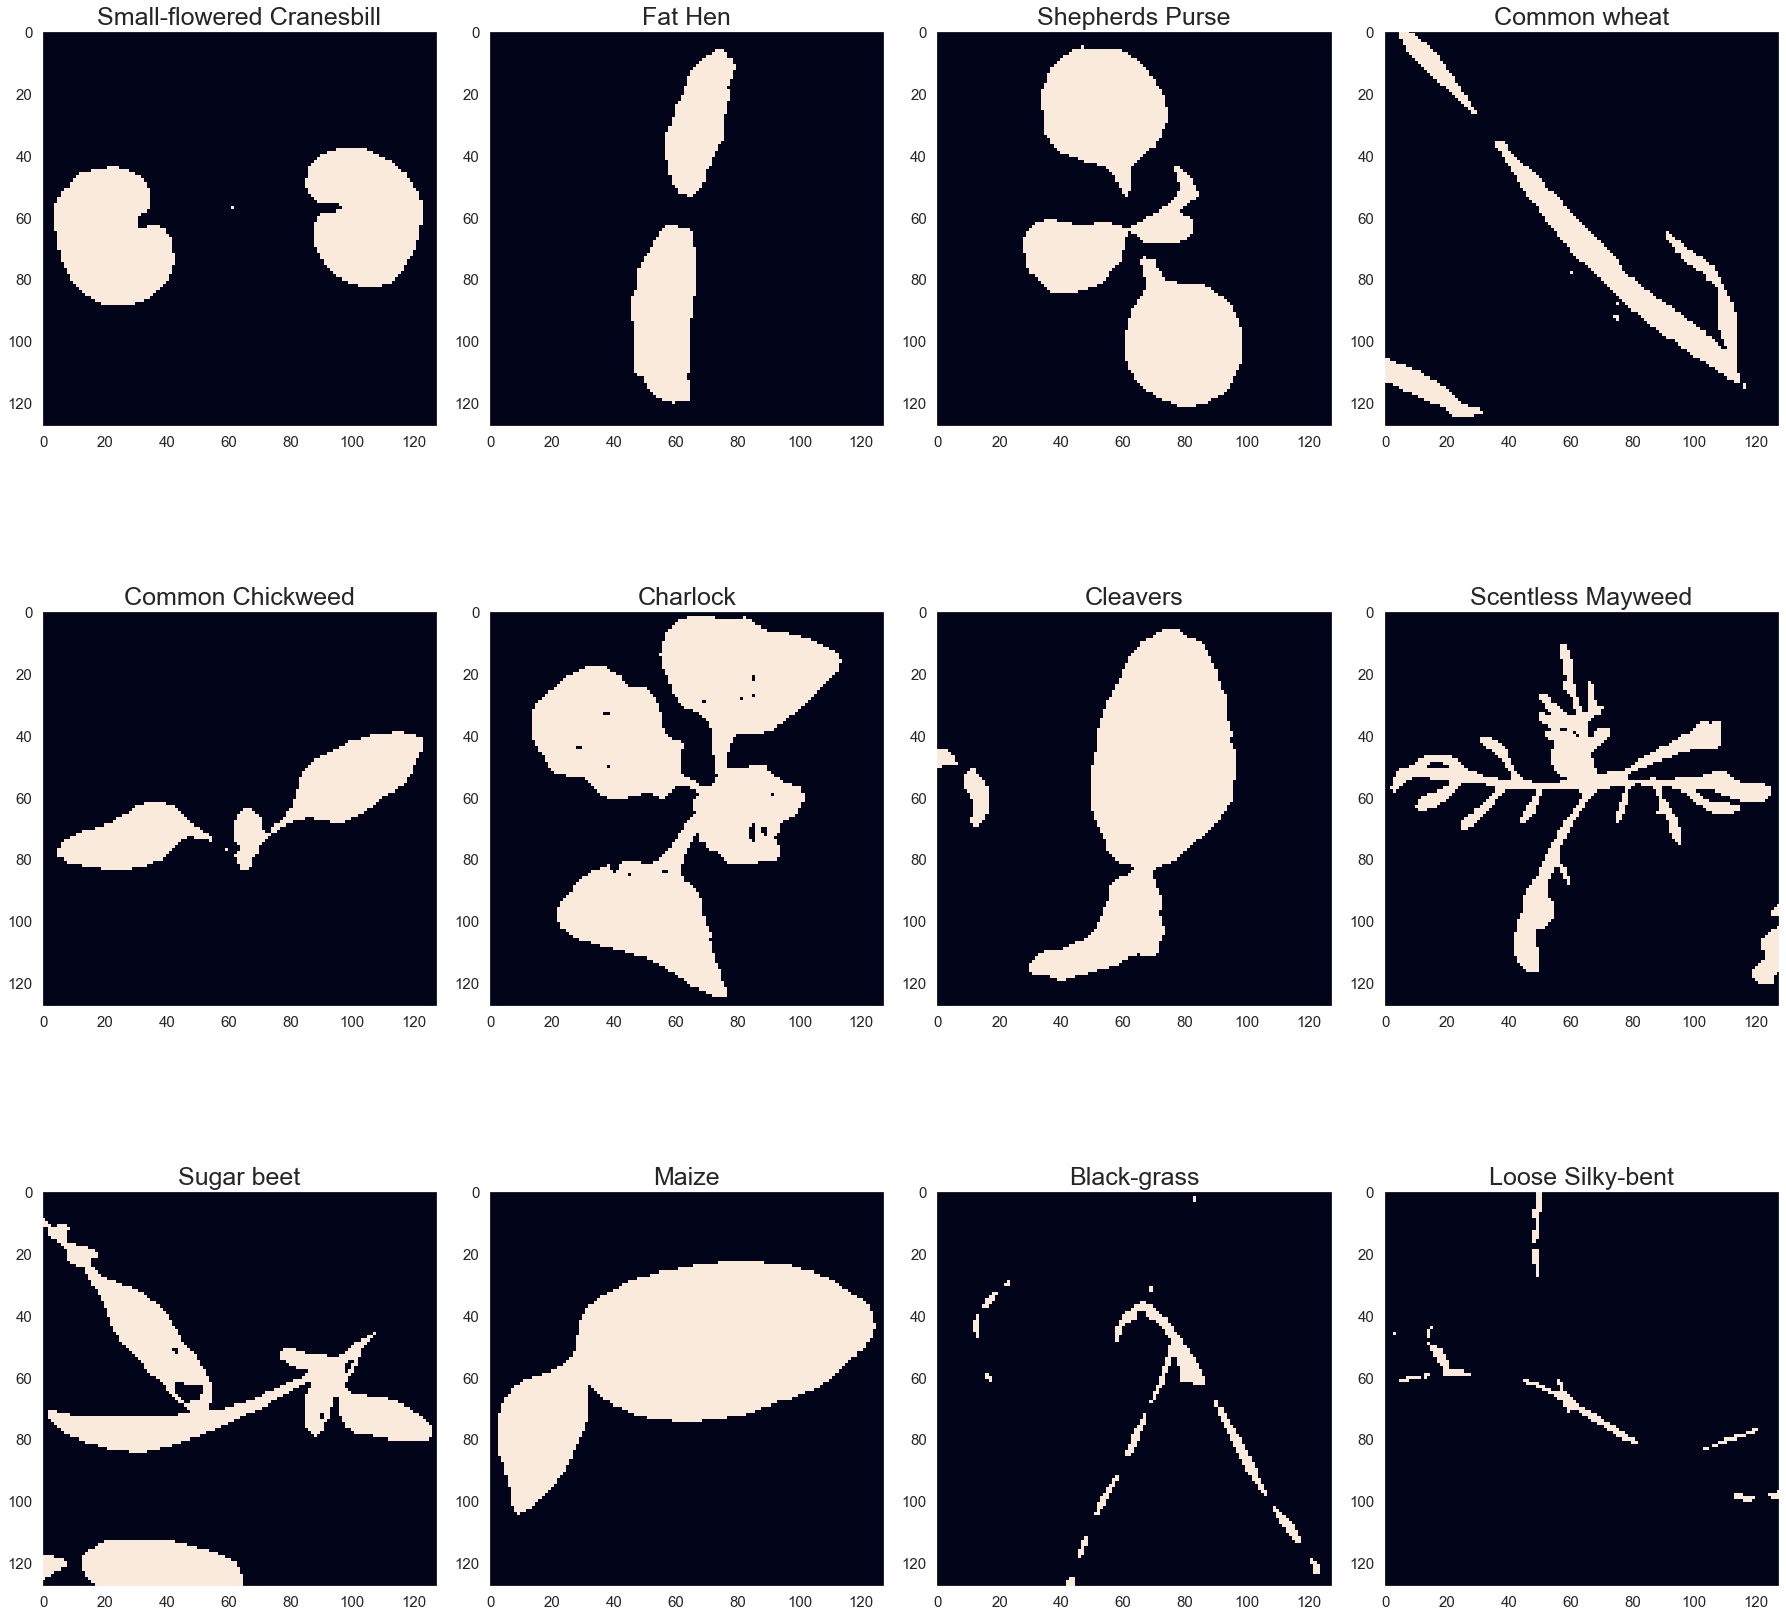

<IPython.core.display.Javascript object>

In [41]:
# Plot one sample from each of 12 seedlings
plot_images_each(images_mask, channels=None)

#### D. Apply Morphological transformations

In [42]:
# Lets apply Morphological transformations for better identification of plant seedling part
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
images_mask_2 = []
for i in range(len(images_mask)):
    images_mask_2.append(cv2.morphologyEx(images_mask[i], cv2.MORPH_CLOSE, kernel))


<IPython.core.display.Javascript object>

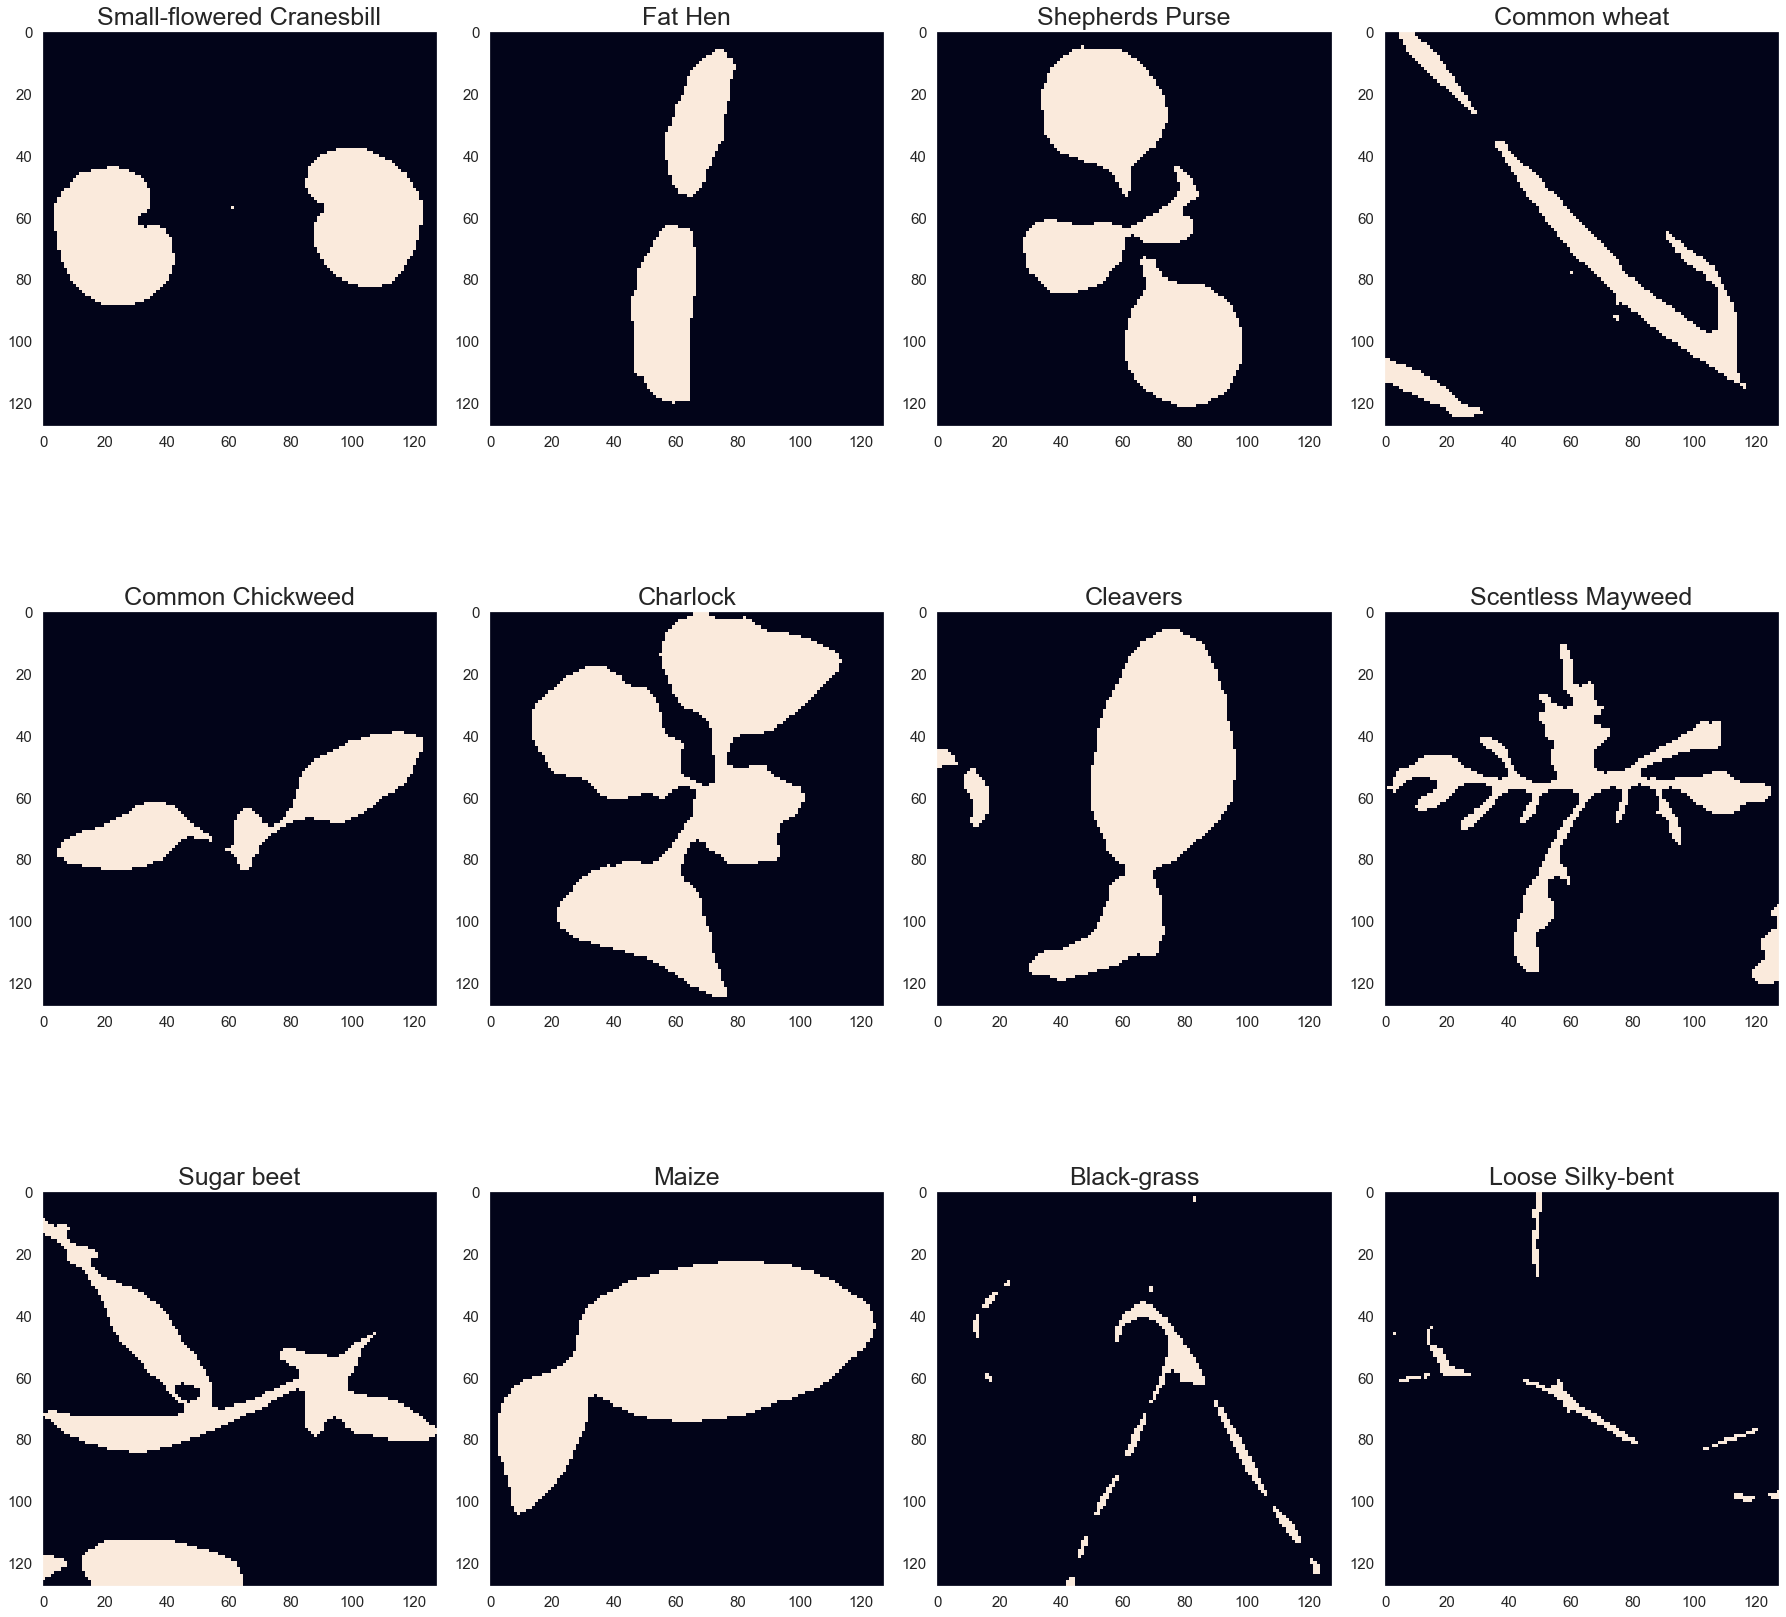

<IPython.core.display.Javascript object>

In [43]:
# Plot one sample from each of 12 seedlings
plot_images_each(images_mask_2, channels=None)

#### E. Apply Masking on Original Images

In [44]:
# Lets blend image mask onto original image to get plant seedling part alone
images_segment = []
for i, mask in enumerate(images_mask_2):
    images_segment.append(cv2.bitwise_and(images[i], images[i], mask=mask))

<IPython.core.display.Javascript object>

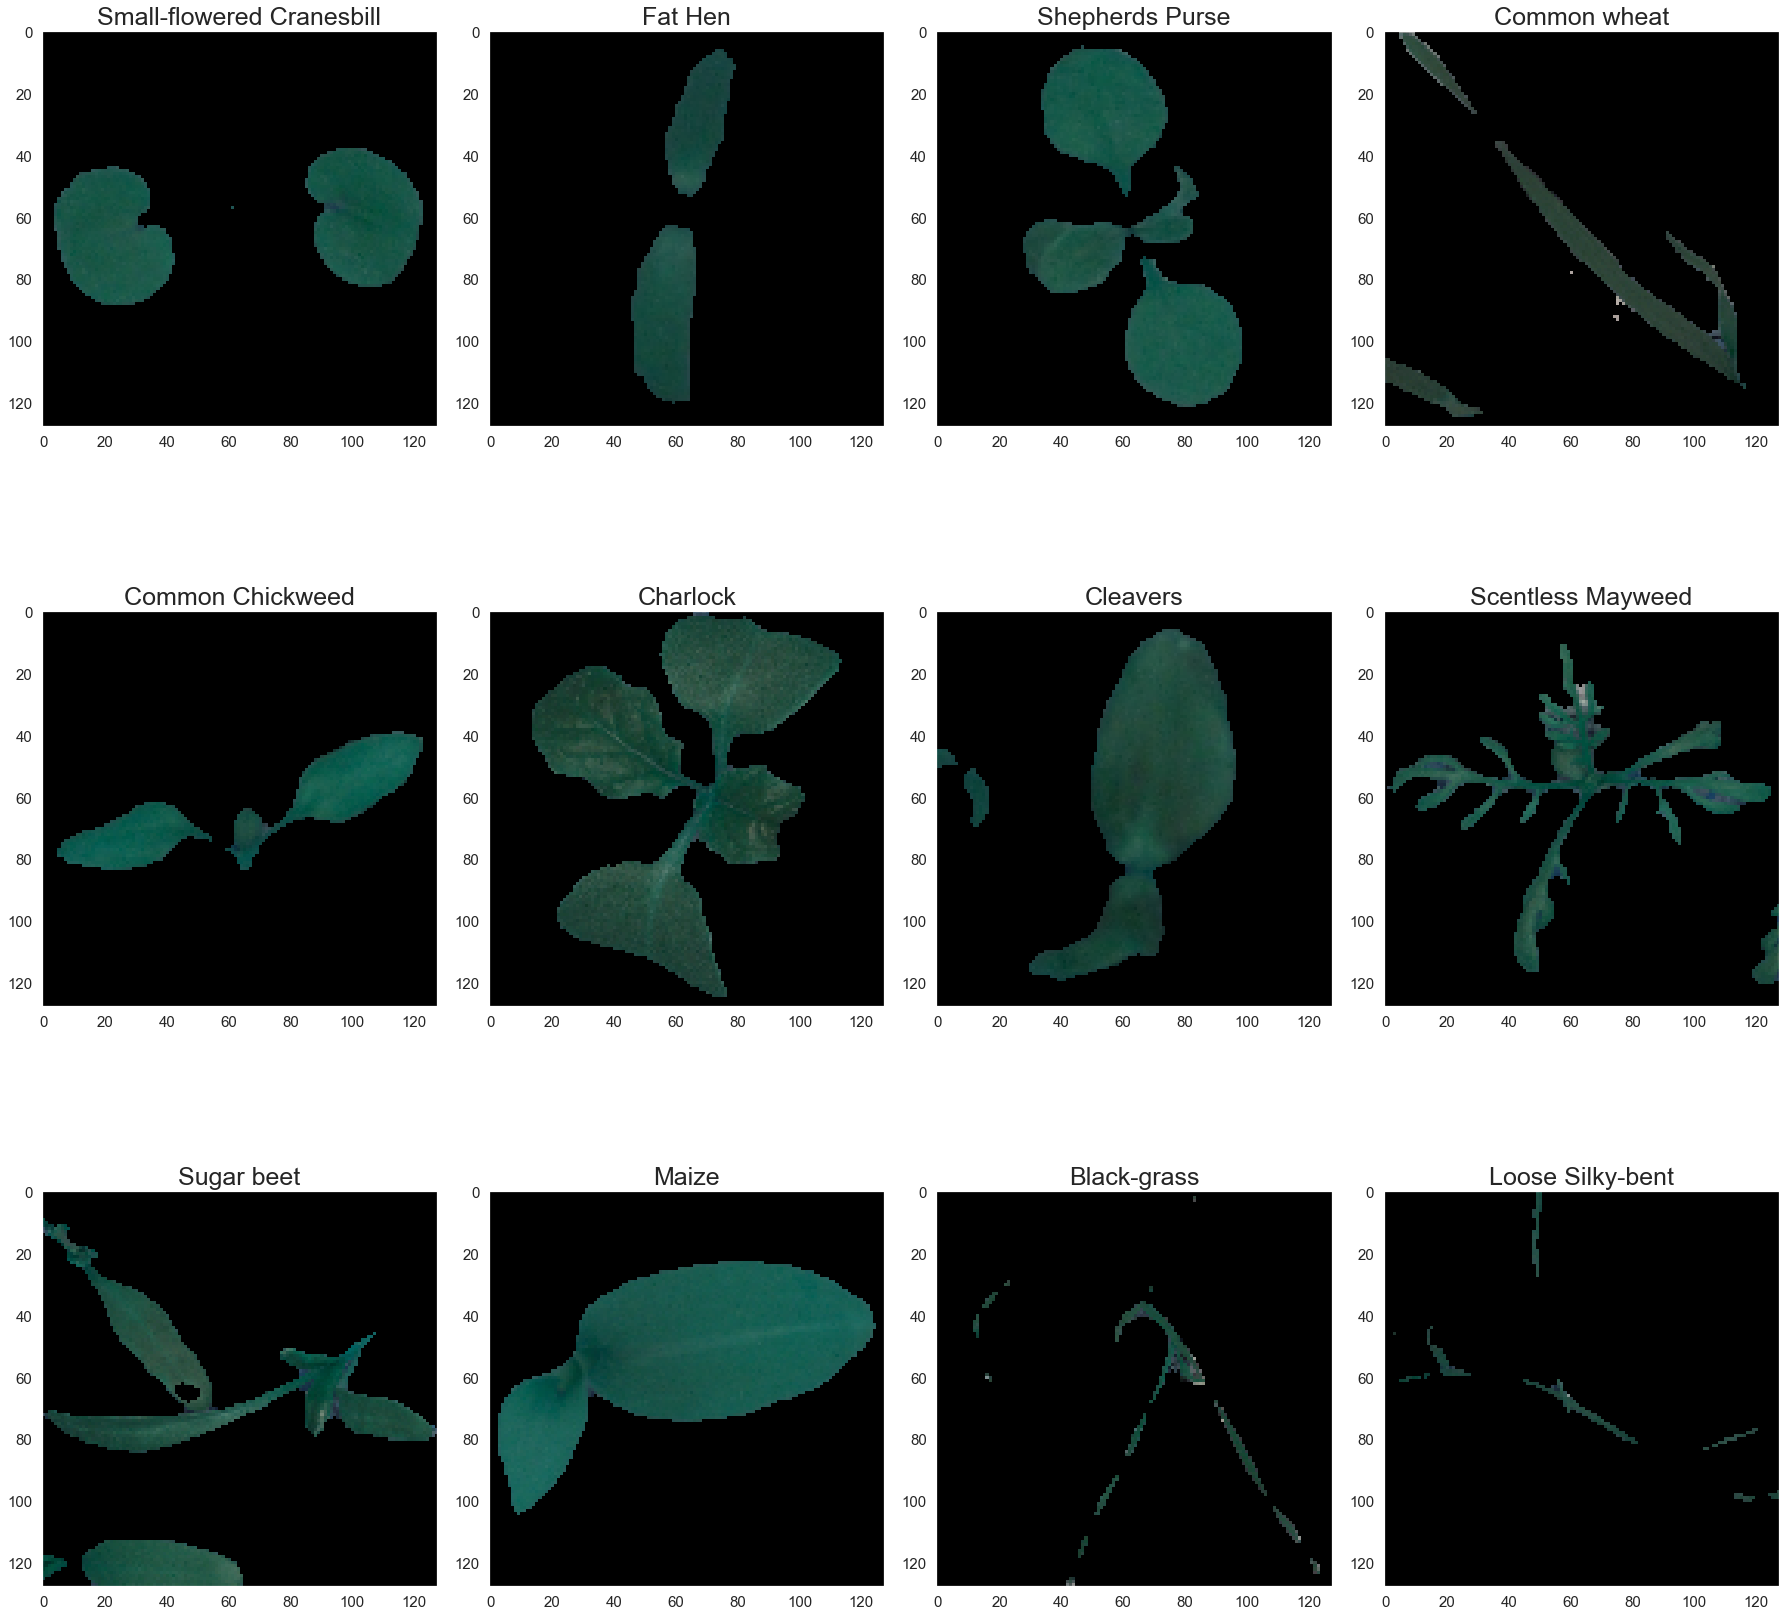

<IPython.core.display.Javascript object>

In [45]:
# Plot one sample from each of 12 seedlings
plot_images_each(images_segment)

#### F. Apply Sharpening

In [46]:
# Lets sharpen image to get more suitable plant seedling part
sharpen_filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

images_sharpen = []
for i in range(len(images_segment)):
    images_sharpen.append(cv2.filter2D(images_segment[i], -1, sharpen_filter))

<IPython.core.display.Javascript object>

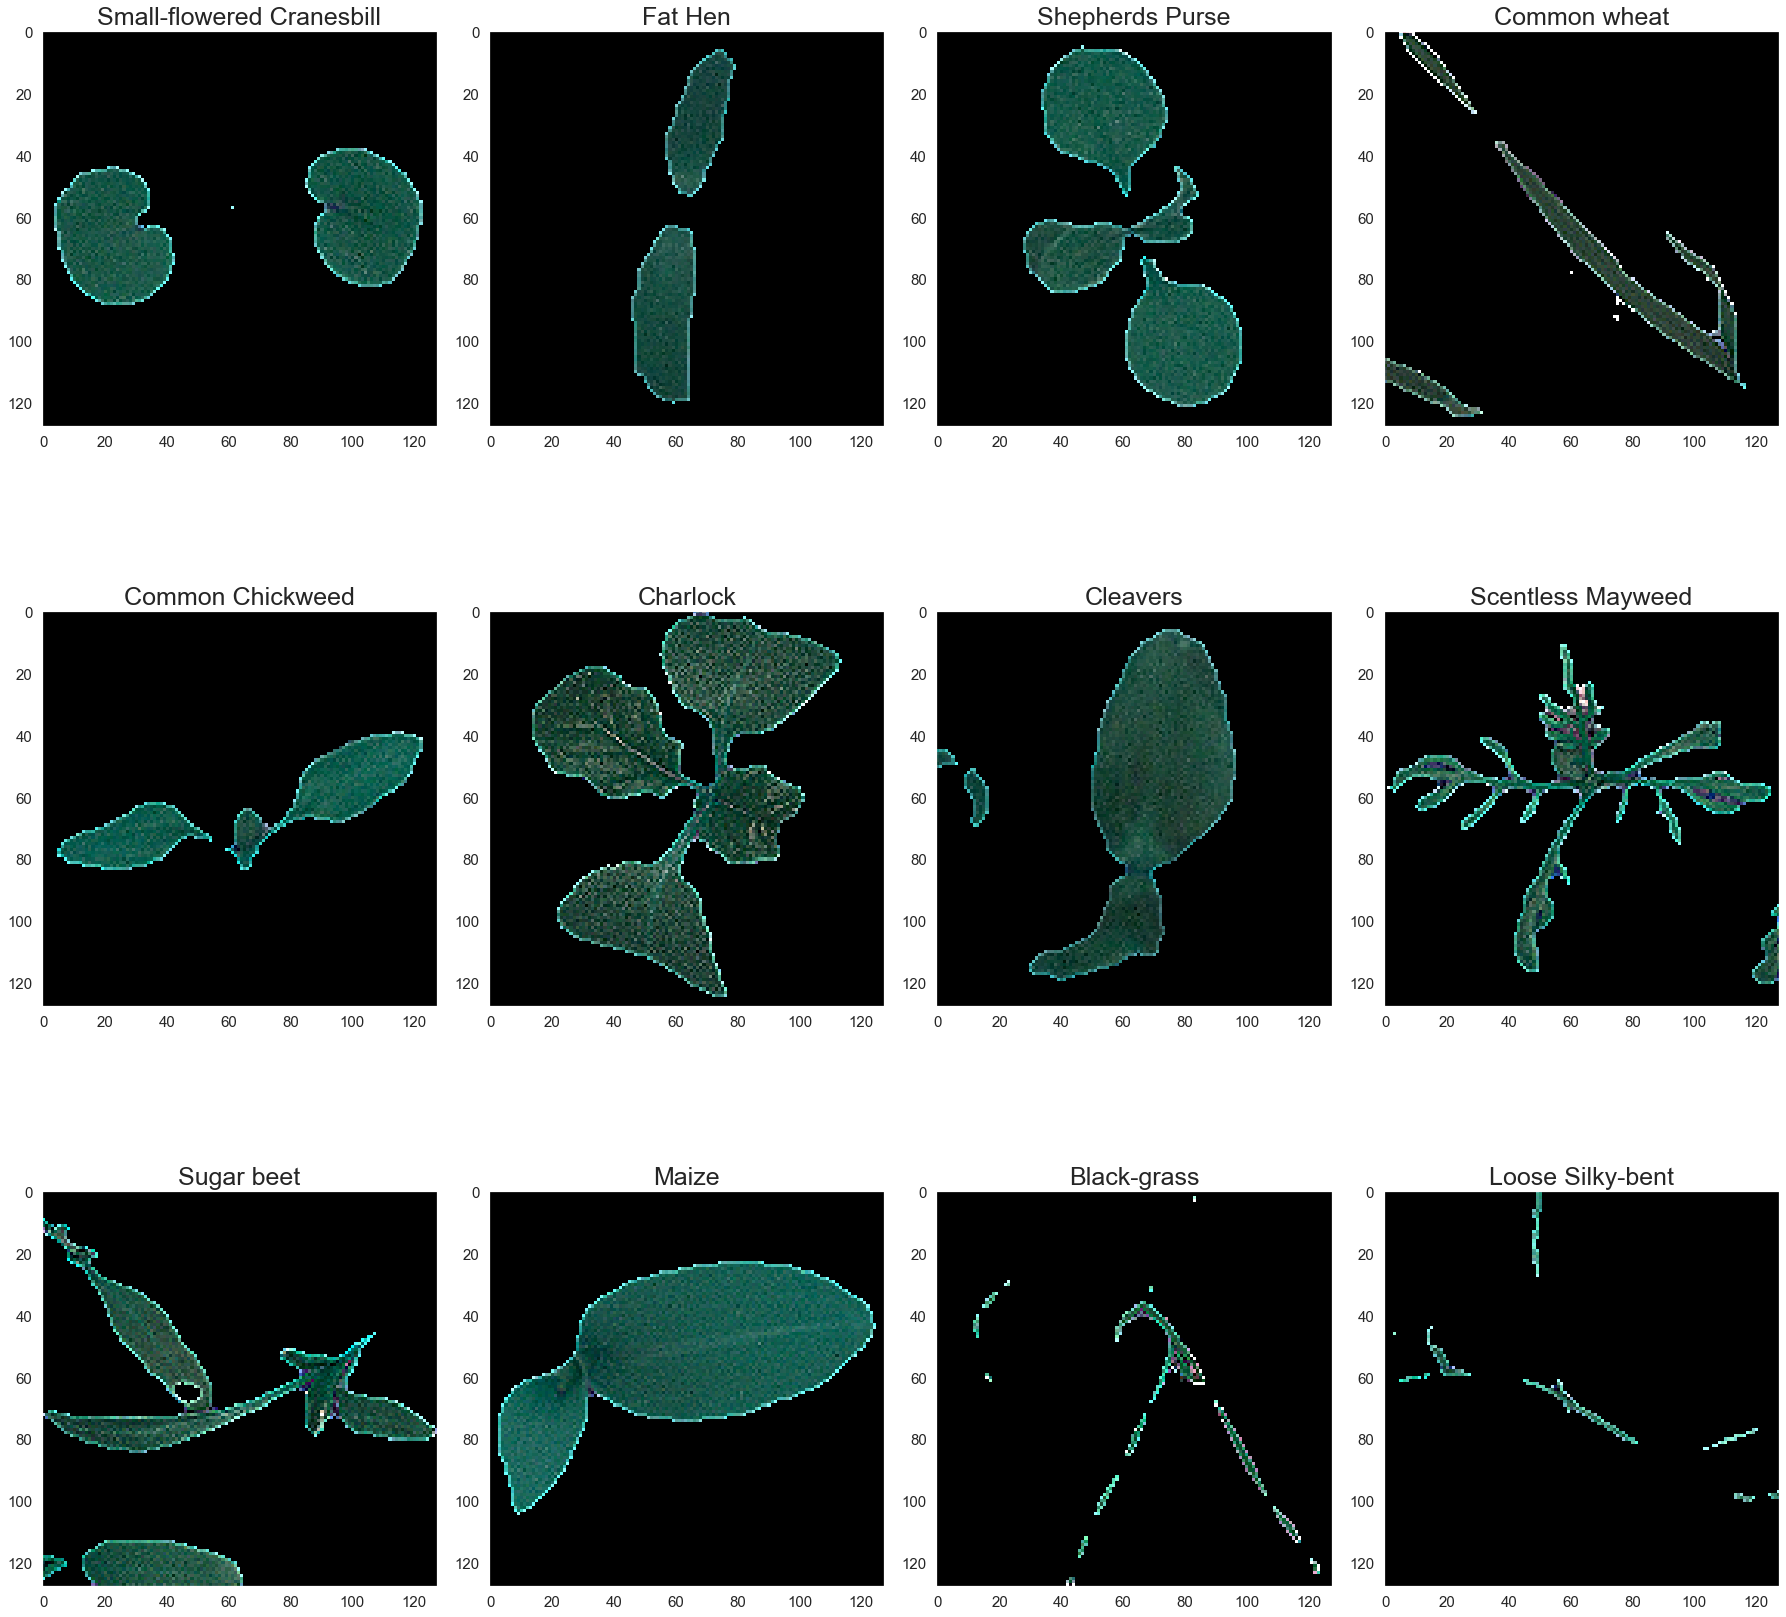

<IPython.core.display.Javascript object>

In [47]:
# Plot one sample from each of 12 seedlings
plot_images_each(images_sharpen)

#### G. Apply Size Reduction

In [48]:
# lets re-size image to 64*64 to reduce model computational time
images_pre_processed = []
for i in range(len(images_sharpen)):
    images_pre_processed.append(
        cv2.resize(images_sharpen[i], (64, 64), interpolation=cv2.INTER_AREA)
    )

<IPython.core.display.Javascript object>

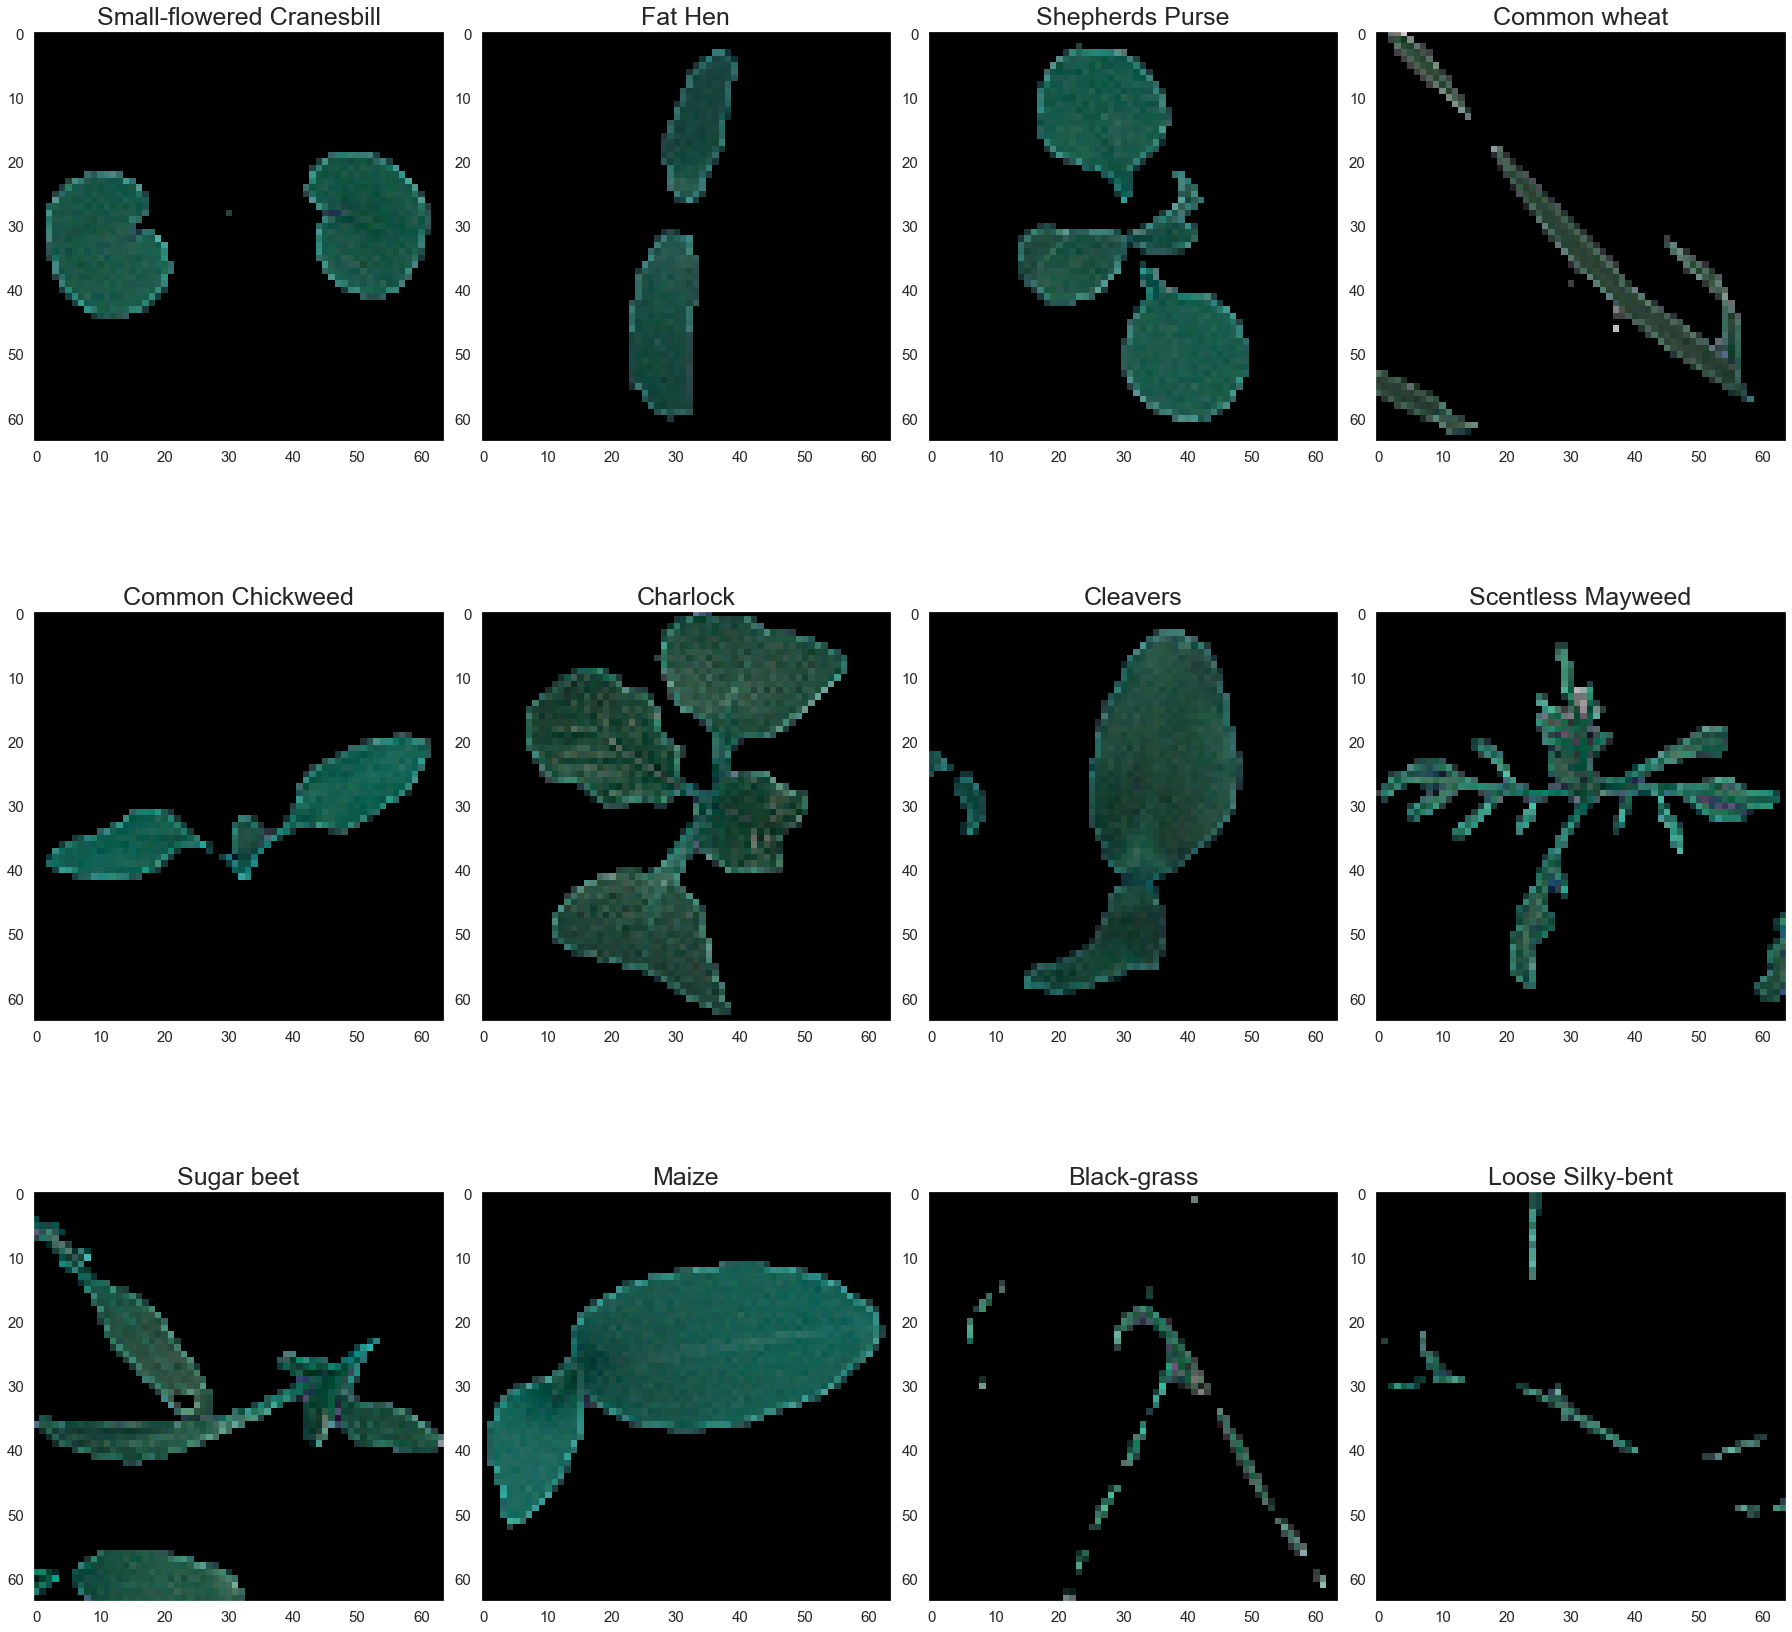

<IPython.core.display.Javascript object>

In [49]:
# Plot one sample from each of 12 seedlings
plot_images_each(images_pre_processed, pixels=64)

#### H. Data Split - Training & Test

In [50]:
# Splitting data in temporary and test sets
X_temp, X_test, y_temp, y_test = train_test_split(
    np.array(images_pre_processed),
    labels,
    test_size=0.20,
    random_state=1,
    stratify=labels,
)

<IPython.core.display.Javascript object>

In [51]:
# Splitting temporary data in train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.20, random_state=1, stratify=y_temp
)

<IPython.core.display.Javascript object>

#### I. Check Data Split

In [52]:
# Check split of data

print(
    "{0:0.2f}% data is in Training set".format((len(X_train) / len(labels.index)) * 100)
)
print(
    "{0:0.2f}% data is in Validation set".format((len(X_val) / len(labels.index)) * 100)
)
print("{0:0.2f}% data is in Test set".format((len(X_test) / len(labels.index)) * 100))

64.00% data is in Training set
16.00% data is in Validation set
20.00% data is in Test set


<IPython.core.display.Javascript object>

In [53]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of Test set : ", X_test.shape)
print("Percentage of classes in Training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in Validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in Test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3040, 64, 64, 3)
Shape of Validation set :  (760, 64, 64, 3)
Shape of Test set :  (950, 64, 64, 3)
Percentage of classes in Training set:
Label                    
Loose Silky-bent            0.14
Common Chickweed            0.13
Scentless Mayweed           0.11
Small-flowered Cranesbill   0.10
Fat Hen                     0.10
Charlock                    0.08
Sugar beet                  0.08
Cleavers                    0.06
Black-grass                 0.06
Shepherds Purse             0.05
Common wheat                0.05
Maize                       0.05
dtype: float64
Percentage of classes in Validation set:
Label                    
Loose Silky-bent            0.14
Common Chickweed            0.13
Scentless Mayweed           0.11
Small-flowered Cranesbill   0.10
Fat Hen                     0.10
Charlock                    0.08
Sugar beet                  0.08
Cleavers                    0.06
Black-grass                 0.06
Shepherds Purse             0.05
Co

<IPython.core.display.Javascript object>

### 9. Make Data Compatible<a id='9. Make Data Compatible'></a>

#### A. Encoding the Target Labels

In [54]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer

enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded = enc.transform(y_val)
y_test_encoded = enc.transform(y_test)

<IPython.core.display.Javascript object>

#### B. Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [55]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0


<IPython.core.display.Javascript object>

#### C. Check Shape of Data

In [56]:
# checking number of columns and rows
print(
    f"Images have shape {X_train_normalized.shape[1]} X {X_train_normalized.shape[2]} X {X_train_normalized.shape[3]}"
)

Images have shape 64 X 64 X 3


<IPython.core.display.Javascript object>

### 10. Model Building - Convolutional Neural Network (CNN)<a id='10. Model Building - Convolutional Neural Network (CNN)'></a>

In [57]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

<IPython.core.display.Javascript object>

In [58]:
# Fixing the seed for random number generators
import random

np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

<IPython.core.display.Javascript object>

In [59]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(
    Conv2D(64, (3, 3), activation="relu", padding="same", input_shape=(64, 64, 3))
)

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding="same"))

model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.3))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model.add(Dense(12, activation="softmax"))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt = Adam(learning_rate=1e-3)
# Compile model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

<IPython.core.display.Javascript object>

In [60]:
history = model.fit(
    X_train_normalized,
    y_train_encoded,
    epochs=35,
    # validation_split=0.1,
    validation_data=(X_val_normalized, y_val_encoded),
    # shuffle=True,
    batch_size=64,
    verbose=0,
    # seed=1,
)

<IPython.core.display.Javascript object>

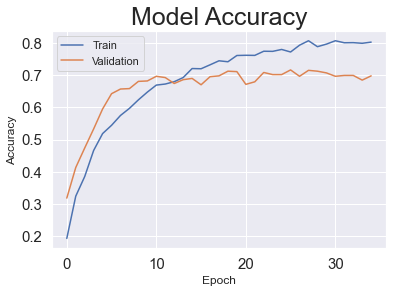

<IPython.core.display.Javascript object>

In [61]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [62]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=1)

30/30 [==============================] - 0s 15ms/step - loss: 1.4459 - accuracy: 0.6663


<IPython.core.display.Javascript object>

In [63]:
# Here we would get the output as probablities for each category
y_pred = model.predict(X_test_normalized)

<IPython.core.display.Javascript object>

In [64]:
# Get unique list of labels
labels["Label"].unique()

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

<IPython.core.display.Javascript object>

In [65]:
# Create a list of plant seedlings for plotting in confusion matrix
species = [
    "Black-grass",
    "Charlock",
    "Cleavers",
    "Common Chickweed",
    "Common wheat",
    "Fat Hen",
    "Loose Silky-bent",
    "Maize",
    "Scentless Mayweed",
    "Shepherds Purse",
    "Small-flowered Cranesbill",
    "Sugar beet",
]

<IPython.core.display.Javascript object>

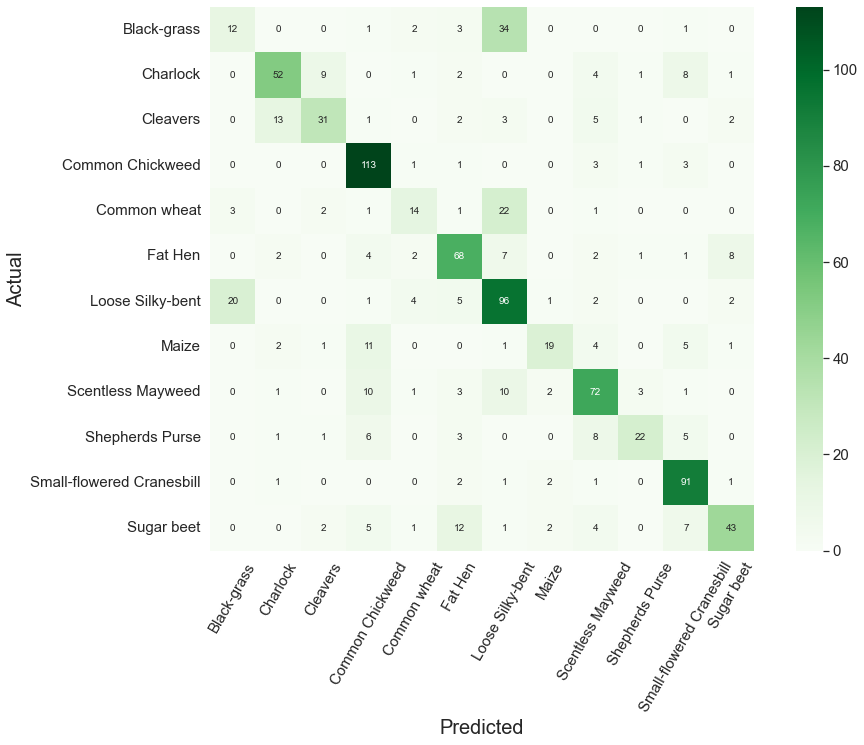

<IPython.core.display.Javascript object>

In [66]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=0.002,
    fmt="d",
    square=True,
    ax=ax,
    cmap=plt.cm.Greens,
    linecolor="black",
    xticklabels=species,
    yticklabels=species,
)
plt.xticks(rotation=60)
ax.set_ylabel("Actual", fontsize=20)
ax.set_xlabel("Predicted", fontsize=20)
plt.show()

In [67]:
# Print classification report for various metrics like precision, recall and f1-score
print(classification_report(y_test_arg, y_pred_arg, target_names=species))

                           precision    recall  f1-score   support

              Black-grass       0.34      0.23      0.27        53
                 Charlock       0.72      0.67      0.69        78
                 Cleavers       0.67      0.53      0.60        58
         Common Chickweed       0.74      0.93      0.82       122
             Common wheat       0.54      0.32      0.40        44
                  Fat Hen       0.67      0.72      0.69        95
         Loose Silky-bent       0.55      0.73      0.63       131
                    Maize       0.73      0.43      0.54        44
        Scentless Mayweed       0.68      0.70      0.69       103
          Shepherds Purse       0.76      0.48      0.59        46
Small-flowered Cranesbill       0.75      0.92      0.82        99
               Sugar beet       0.74      0.56      0.64        77

                 accuracy                           0.67       950
                macro avg       0.66      0.60      0.62    

<IPython.core.display.Javascript object>

### Observations :
- Accuracy on test data is around 66%. Need to improve model performance
- We observe that some of the classes are not predicted correctly. Especially, metrics of "Black-grass" is very low
- In comparison to the rest, we can see that classes "Common Chickweed","Small-flowered Cranesbill", and "Fat Hen" are well classified.
- We can also observe that classes "Black-grass","Cleavers","Common wheat" etc are mostly misclassified.

### 11. Model Performance Improvement<a id='11. Model Performance Improvement'></a>

As we can see, our initial model appears to overfit. Therefore we'll try to address this problem with data augmentation and Batch Normalization to check if we can improve the model's performance.

#### Data Augmentation

In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs. To overcome this problem, one approach we might consider is **Data Augmentation**. CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. <br> Taking this attribute into account, we can augment the images using the techniques listed below - <br>
**1. Horizontal Flip** (should be set to True/False) <br>
**2. Vertical Flip** (should be set to True/False) <br>
**3. Height Shift** (should be between 0 and 1) <br>
**4. Width Shift** (should be between 0 and 1) <br>
**5. Rotation** (should be between 0 and 180) <br>
**6. Shear** (should be between 0 and 1) <br>
**7. Zoom** (should be between 0 and 1) etc. <br>

Remember, **data augmentation should not be used in the validation/test data set**.

In [68]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
import random

np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

<IPython.core.display.Javascript object>

In [69]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(#rescale=1. / 255.0,
                              horizontal_flip = True,
                              vertical_flip = True, 
                              height_shift_range= 0.1, 
                              width_shift_range=0.1, 
                              rotation_range=360, 
                              shear_range = 0.1,
                              zoom_range=0.1)


<IPython.core.display.Javascript object>

In [70]:
# Intializing a sequential model
model_augmented = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model_augmented.add(
    Conv2D(64, (3, 3), activation="relu", padding="same", input_shape=(64, 64, 3))
)

# Adding max pooling to reduce the size of output of first conv layer
model_augmented.add(MaxPooling2D((2, 2), padding="same"))

# model.add(BatchNormalization())
model_augmented.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model_augmented.add(MaxPooling2D((2, 2), padding="same"))

model_augmented.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_augmented.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model_augmented.add(Dense(16, activation="relu"))
model_augmented.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model_augmented.add(Dense(12, activation="softmax"))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt = Adam(learning_rate=1e-3)
# Compile model
model_augmented.compile(
    optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"]
)

# Generating the summary of the model
model_augmented.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                        

<IPython.core.display.Javascript object>

In [71]:
# Epochs
epochs = 35
# Batch size
batch_size = 64

history = model_augmented.fit(
    train_datagen.flow(
        X_train_normalized,
        y_train_encoded,
        batch_size=batch_size,
        seed=1,
        shuffle=False,
    ),
    epochs=epochs,
    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
    validation_data=(X_val_normalized, y_val_encoded),
    verbose=0,
)

<IPython.core.display.Javascript object>

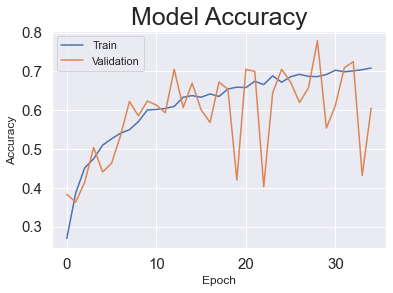

<IPython.core.display.Javascript object>

In [72]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [73]:
accuracy = model_augmented.evaluate(X_test_normalized, y_test_encoded, verbose=1)

30/30 [==============================] - 1s 24ms/step - loss: 1.5060 - accuracy: 0.5832


<IPython.core.display.Javascript object>

In [74]:
# Here we would get the output as probablities for each category
y_pred = model_augmented.predict(X_test_normalized)

<IPython.core.display.Javascript object>

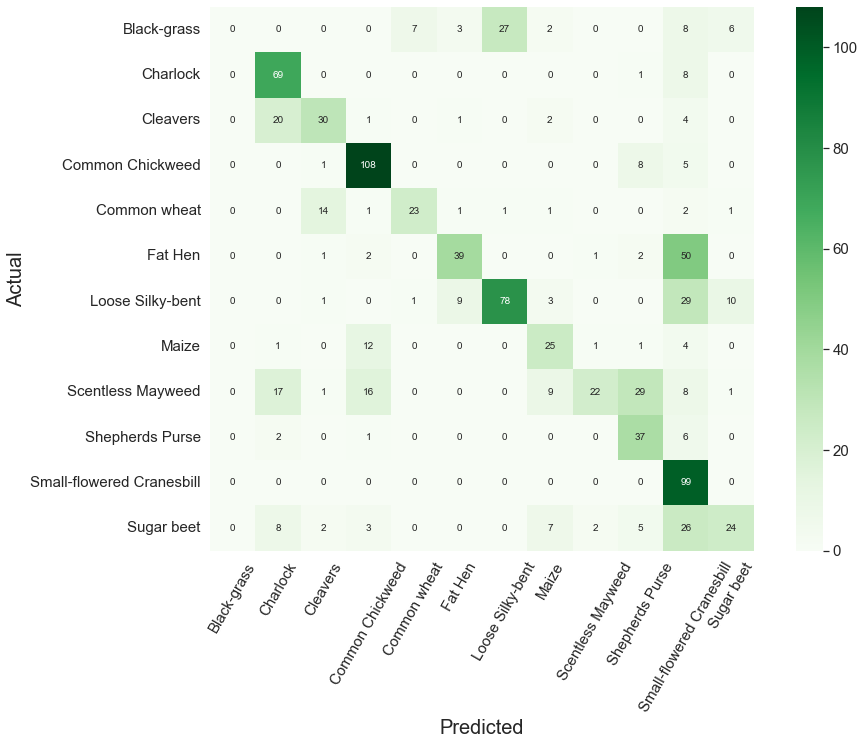

<IPython.core.display.Javascript object>

In [75]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=0.002,
    fmt="d",
    square=True,
    ax=ax,
    cmap=plt.cm.Greens,
    linecolor="black",
    xticklabels=species,
    yticklabels=species,
)
plt.xticks(rotation=60)
ax.set_ylabel("Actual", fontsize=20)
ax.set_xlabel("Predicted", fontsize=20)
plt.show()

In [76]:
print(classification_report(y_test_arg, y_pred_arg, target_names=species))

                           precision    recall  f1-score   support

              Black-grass       0.00      0.00      0.00        53
                 Charlock       0.59      0.88      0.71        78
                 Cleavers       0.60      0.52      0.56        58
         Common Chickweed       0.75      0.89      0.81       122
             Common wheat       0.74      0.52      0.61        44
                  Fat Hen       0.74      0.41      0.53        95
         Loose Silky-bent       0.74      0.60      0.66       131
                    Maize       0.51      0.57      0.54        44
        Scentless Mayweed       0.85      0.21      0.34       103
          Shepherds Purse       0.45      0.80      0.57        46
Small-flowered Cranesbill       0.40      1.00      0.57        99
               Sugar beet       0.57      0.31      0.40        77

                 accuracy                           0.58       950
                macro avg       0.58      0.56      0.52    

<IPython.core.display.Javascript object>

### Observations :
- Accuracy on test data is around 58%. Need to improve model performance
- We observe that some of the classes are not predicted correctly. Especially, metrics of "Black-grass" is very low
- In comparison to the rest, we can see that classes "Common Chickweed","Small-flowered Cranesbill", and "Fat Hen" are well classified.
- We can also observe that classes "Black-grass","Cleavers","Common wheat" etc are mostly misclassified.

### 12. Transfer Learning using VGG16<a id='12. Transfer Learning using VGG16'></a>

In [77]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16


<IPython.core.display.Javascript object>

In [78]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
import random

np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

<IPython.core.display.Javascript object>

In [79]:
vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(64, 64, 3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

<IPython.core.display.Javascript object>

In [80]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

<IPython.core.display.Javascript object>

In [81]:
from keras import callbacks

<IPython.core.display.Javascript object>

In [82]:
transfer_learn_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
transfer_learn_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
transfer_learn_model.add(Flatten())
# Initialize weight
initializer = tf.keras.initializers.HeUniform()
# Regularize L2
regularizer = tf.keras.regularizers.l2(l2=0.01)

# Adding a dense output layer
transfer_learn_model.add(
    Dense(
        32,
        activation="relu",
        kernel_initializer=initializer,
        kernel_regularizer=regularizer,
    )
)
transfer_learn_model.add(BatchNormalization())
transfer_learn_model.add(
    Dense(
        16,
        activation="relu",
        kernel_initializer=initializer,
        kernel_regularizer=regularizer,
    )
)
transfer_learn_model.add(BatchNormalization())
transfer_learn_model.add(Dense(12, activation="softmax"))

opt = Adam(learning_rate=1e-3)
cb = callbacks.EarlyStopping(monitor="val_loss", patience=5)
# Compile model
transfer_learn_model.compile(
    optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"]
)

# Generating the summary of the model
transfer_learn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                        

<IPython.core.display.Javascript object>

In [83]:
history = transfer_learn_model.fit(
    X_train_normalized,
    y_train_encoded,
    epochs=35,
    # validation_split=0.1,
    validation_data=(X_val_normalized, y_val_encoded),
    # shuffle=True,
    batch_size=64,
    verbose=0,
    # seed=1,
)

<IPython.core.display.Javascript object>

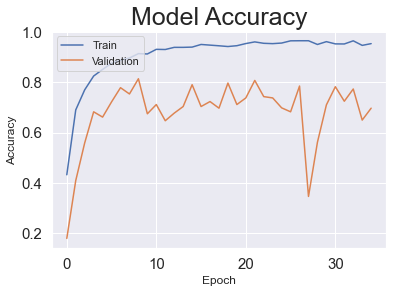

<IPython.core.display.Javascript object>

In [84]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [85]:
accuracy = transfer_learn_model.evaluate(X_test_normalized, y_test_encoded, verbose=1)

30/30 [==============================] - 6s 200ms/step - loss: 1.4556 - accuracy: 0.6516


<IPython.core.display.Javascript object>

In [86]:
# Here we would get the output as probablities for each category
y_pred = transfer_learn_model.predict(X_test_normalized)

<IPython.core.display.Javascript object>

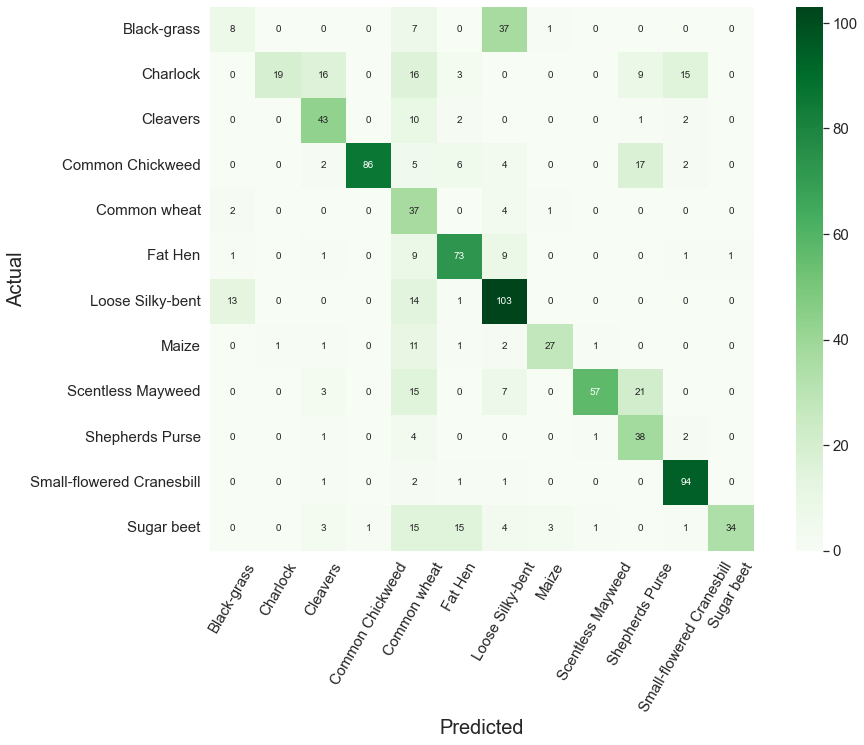

<IPython.core.display.Javascript object>

In [87]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=0.002,
    fmt="d",
    square=True,
    ax=ax,
    cmap=plt.cm.Greens,
    linecolor="black",
    xticklabels=species,
    yticklabels=species,
)
plt.xticks(rotation=60)
ax.set_ylabel("Actual", fontsize=20)
ax.set_xlabel("Predicted", fontsize=20)
plt.show()

In [88]:
print(classification_report(y_test_arg, y_pred_arg, target_names=species))

                           precision    recall  f1-score   support

              Black-grass       0.33      0.15      0.21        53
                 Charlock       0.95      0.24      0.39        78
                 Cleavers       0.61      0.74      0.67        58
         Common Chickweed       0.99      0.70      0.82       122
             Common wheat       0.26      0.84      0.39        44
                  Fat Hen       0.72      0.77      0.74        95
         Loose Silky-bent       0.60      0.79      0.68       131
                    Maize       0.84      0.61      0.71        44
        Scentless Mayweed       0.95      0.55      0.70       103
          Shepherds Purse       0.44      0.83      0.58        46
Small-flowered Cranesbill       0.80      0.95      0.87        99
               Sugar beet       0.97      0.44      0.61        77

                 accuracy                           0.65       950
                macro avg       0.71      0.64      0.61    

<IPython.core.display.Javascript object>

### Observations :
- Accuracy on test data is around 65%. Need to improve model performance
- We observe that some of the classes are not predicted correctly. Especially, metrics of "Black-grass" is very low
- In comparison to the rest, we can see that classes "Common Chickweed","Small-flowered Cranesbill", and "Fat Hen" are well classified.
- We can also observe that classes "Black-grass","Cleavers","Common wheat" etc are mostly misclassified.

### 13. Transfer Learning using VGG16 + Data Augmentation<a id='13. Transfer Learning using VGG16 + Data Augmentation'></a>

In [89]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
import random

np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

<IPython.core.display.Javascript object>

In [90]:
transfer_learn_model_augmented = Sequential()

# Adding the convolutional part of the VGG16 model from above
transfer_learn_model_augmented.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
transfer_learn_model_augmented.add(Flatten())
# Initialize weight
initializer = tf.keras.initializers.HeUniform()
# Regularize L2
regularizer = tf.keras.regularizers.l2(l2=0.01)

# Adding a dense output layer
transfer_learn_model_augmented.add(
    Dense(
        32,
        activation="relu",
        kernel_initializer=initializer,
        kernel_regularizer=regularizer,
    )
)
transfer_learn_model_augmented.add(BatchNormalization())
transfer_learn_model_augmented.add(
    Dense(
        16,
        activation="relu",
        kernel_initializer=initializer,
        kernel_regularizer=regularizer,
    )
)
transfer_learn_model_augmented.add(BatchNormalization())
transfer_learn_model_augmented.add(Dense(12, activation="softmax"))

opt = Adam(learning_rate=1e-3)
cb = callbacks.EarlyStopping(monitor="val_loss", patience=5)
# Compile model
transfer_learn_model_augmented.compile(
    optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"]
)

# Generating the summary of the model
transfer_learn_model_augmented.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                        

<IPython.core.display.Javascript object>

In [91]:
# Epochs
epochs = 35
# Batch size
batch_size = 64

history = transfer_learn_model_augmented.fit(
    train_datagen.flow(
        X_train_normalized,
        y_train_encoded,
        batch_size=batch_size,
        seed=1,
        shuffle=False,
    ),
    epochs=epochs,
    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
    validation_data=(X_val_normalized, y_val_encoded),
    verbose=0,
    # callbacks=[cb],
)

<IPython.core.display.Javascript object>

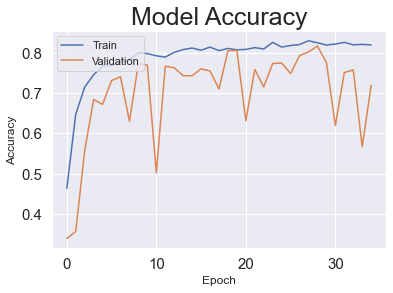

<IPython.core.display.Javascript object>

In [92]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [93]:
accuracy = transfer_learn_model_augmented.evaluate(
    X_test_normalized, y_test_encoded, verbose=1
)

30/30 [==============================] - 6s 215ms/step - loss: 1.0399 - accuracy: 0.7095


<IPython.core.display.Javascript object>

In [94]:
# Here we would get the output as probablities for each category
y_pred = transfer_learn_model_augmented.predict(X_test_normalized)

<IPython.core.display.Javascript object>

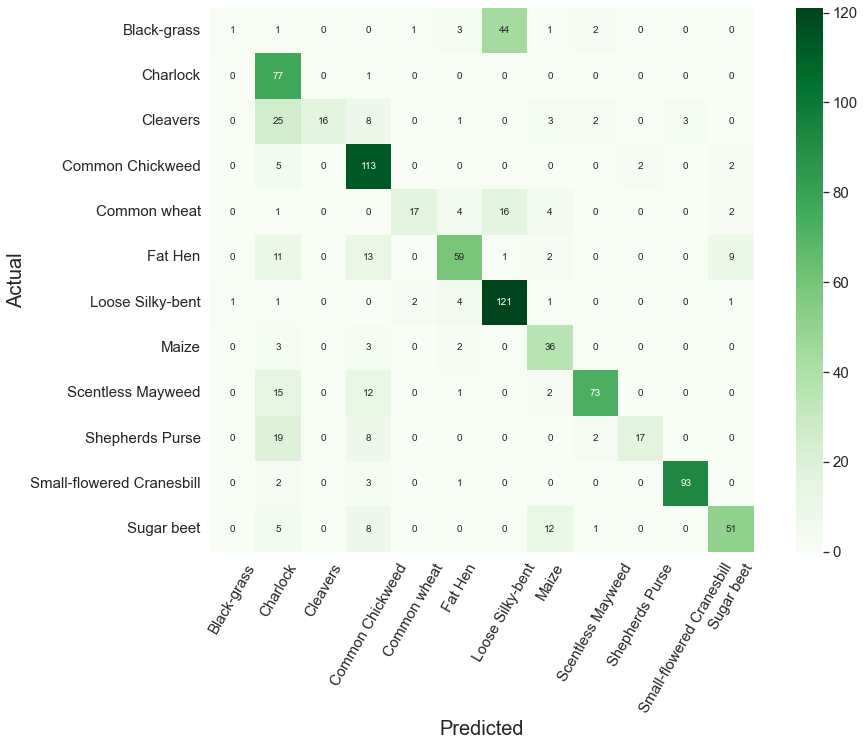

<IPython.core.display.Javascript object>

In [95]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=0.002,
    fmt="d",
    square=True,
    ax=ax,
    cmap=plt.cm.Greens,
    linecolor="black",
    xticklabels=species,
    yticklabels=species,
)
plt.xticks(rotation=60)
ax.set_ylabel("Actual", fontsize=20)
ax.set_xlabel("Predicted", fontsize=20)
plt.show()

In [96]:
print(classification_report(y_test_arg, y_pred_arg, target_names=species))

                           precision    recall  f1-score   support

              Black-grass       0.50      0.02      0.04        53
                 Charlock       0.47      0.99      0.63        78
                 Cleavers       1.00      0.28      0.43        58
         Common Chickweed       0.67      0.93      0.78       122
             Common wheat       0.85      0.39      0.53        44
                  Fat Hen       0.79      0.62      0.69        95
         Loose Silky-bent       0.66      0.92      0.77       131
                    Maize       0.59      0.82      0.69        44
        Scentless Mayweed       0.91      0.71      0.80       103
          Shepherds Purse       0.89      0.37      0.52        46
Small-flowered Cranesbill       0.97      0.94      0.95        99
               Sugar beet       0.78      0.66      0.72        77

                 accuracy                           0.71       950
                macro avg       0.76      0.64      0.63    

<IPython.core.display.Javascript object>

### Observations :
- Accuracy on test data is around 70%. Need to improve model performance
- We observe that some of the classes are not predicted correctly. Especially, metrics of "Black-grass" is very low
- In comparison to the rest, we can see that classes "Common Chickweed","Small-flowered Cranesbill", and "Fat Hen" are well classified.
- We can also observe that classes "Black-grass","Cleavers","Common wheat" etc are mostly misclassified.

### 14. Conclusions & Takeaways:<a id='14. Conclusions & Takeaways'></a>

In [97]:
# Print model performance summary
pd.DataFrame(
    {
        "Models": [
            "Base CNN Model",
            "CNN Model with Data Augmentation",
            "VGG16 Transfer Learning Model",
            "VGG16 Transfer Learning Model with Data Augmentation",
        ],
        "Train Accuracy": [
            round(
                model.evaluate(X_train_normalized, y_train_encoded, verbose=0)[1] * 100,
                2,
            ),
            round(
                model_augmented.evaluate(
                    X_train_normalized, y_train_encoded, verbose=0
                )[1]
                * 100,
                2,
            ),
            round(
                transfer_learn_model.evaluate(
                    X_train_normalized, y_train_encoded, verbose=0
                )[1]
                * 100,
                2,
            ),
            round(
                transfer_learn_model_augmented.evaluate(
                    X_train_normalized, y_train_encoded, verbose=0
                )[1]
                * 100,
                2,
            ),
        ],
        "Validation Accuracy": [
            round(
                model.evaluate(X_val_normalized, y_val_encoded, verbose=0)[1] * 100, 2
            ),
            round(
                model_augmented.evaluate(X_val_normalized, y_val_encoded, verbose=0)[1]
                * 100,
                2,
            ),
            round(
                transfer_learn_model.evaluate(
                    X_val_normalized, y_val_encoded, verbose=0
                )[1]
                * 100,
                2,
            ),
            round(
                transfer_learn_model_augmented.evaluate(
                    X_val_normalized, y_val_encoded, verbose=0
                )[1]
                * 100,
                2,
            ),
        ],
        "Test Accuracy": [
            round(
                model.evaluate(X_test_normalized, y_test_encoded, verbose=0)[1] * 100, 2
            ),
            round(
                model_augmented.evaluate(X_test_normalized, y_test_encoded, verbose=0)[
                    1
                ]
                * 100,
                2,
            ),
            round(
                transfer_learn_model.evaluate(
                    X_test_normalized, y_test_encoded, verbose=0
                )[1]
                * 100,
                2,
            ),
            round(
                transfer_learn_model_augmented.evaluate(
                    X_test_normalized, y_test_encoded, verbose=0
                )[1]
                * 100,
                2,
            ),
        ],
    }
)

Models  Train Accuracy  \
0                                     Base CNN Model           97.66   
1                   CNN Model with Data Augmentation           59.97   
2                      VGG16 Transfer Learning Model           80.43   
3  VGG16 Transfer Learning Model with Data Augmen...           72.73   

   Validation Accuracy  Test Accuracy  
0                69.74          66.63  
1                60.53          58.32  
2                69.74          65.16  
3                71.97          70.95

<IPython.core.display.Javascript object>

### Observations:

- Best model is with VGG16 (Transfer Learning) and Data Augmentation
- We can observe from the confusion matrix of all the models that last model was the best model because it predicted the majority of the classes better than the other models.
- The test accuracy of the last model is 70%.
- Model is right fit. Accuracy in training, validation and test generalise well.

### Scope of Improvement:

- These models can be further improved by training with different filter sizes and different number of filters. 
- These models can also be trained on the original image_size i.e 128 x 128 rather than being reduced to 64.
- Data Augmentation can be performed more and dropout_rate can be changed to improve the model performance.
- Other Transfer Learning architectures can also be used to train the CNN model and these models can be used for classification.
- More training data may also improve accuracy of predictions
- Fixing imbalance in data may also improve peformance on classes which had low score
- Getting images with more clarity can also improve performance.